<a href="https://colab.research.google.com/github/AshbeeKim/dadaiksunTeamProject/blob/main/%EB%B0%9C%ED%91%9C%EC%9E%90%EB%A3%8C/WeatherGO_SEOUL(210723%EB%B0%9C%ED%91%9C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weather Go SEOUL


<big>**Weather Go <small>SEOUL</small>**</big>은 인공지능을 통해 날씨에 따라 관광지의 관광객 수를 예측하고, 관광소비자에게 관광지를 추천해주는 서비스입니다.

- 기대효과

 관광소비자에게 어디를 가면 좋을지를 추천해줌으로써 날씨에 따른 관광지 선택에 있어서 검색에 대한 불편함을 덜어줄 것으로 기대됩니다.

## 구글드라이브 공유 폴더

목적 : 팀프로젝트이기에, 데이터 적재 후 팀원 전원이 데이터 접근의 용이성을 위해 생성

* pd.read_csv(f'{Project Path}/{Dataframe Name}.csv', encoding='utf-8')
* docx 혹은 xls, csv 등에서 필요한 변수명을 불러오는 등의 활용도 가능함
* 팀원들 간 현재 진행 상황이 어떻게 흘러가고 있는지도 폴더 내 디렉토리 접근으로 체크할 수 있음

In [ ]:
# 공유폴더 접근
import os
from google.colab import drive  
from os.path import join

# 구글 드라이브 접근
ROOT = "/content/drive"
drive.mount(ROOT)

# 구글 프로젝트 공유 폴더 경로
CO_WORK = "MyDrive/Proj_WT"
CW_PATH = join(ROOT, CO_WORK)

# 비정제 데이터
DATAS = "DataSets/Seoul"
DATA_PATH = join(CW_PATH, DATAS)

Mounted at /content/drive


In [ ]:
# 기본 모듈
import sys
import re
import random
import time
import warnings
warnings.filterwarnings('ignore')

import csv
import numpy as np
import pandas as pd

from IPython.core.display import display, HTML

In [ ]:
# OpenApi 및 웹크롤링
import json #json을 다루기 위한 모듈
import urllib
import urllib.request
from urllib.request import urlopen
from urllib.parse import urlencode, unquote, quote_plus
import requests
from bs4 import BeautifulSoup as BS
# from IPython.core.display import display, HTML

In [ ]:
# EDA & VSL
!apt-get update -qq
!apt-get install fonts-nanum* -qq
  # 그림그릴때 한글 폰트 깨짐 방지
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
for fontInfo in fm.fontManager.ttflist :
  if 'Nanum' in fontInfo.name :
    print(fontInfo.name+ " = " + fontInfo.fname)

fm._rebuild()

NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumGothic Eco = /usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf
NanumGothic Eco = /usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf
Nanum Pen Script = /usr/share/fonts/truetype/nanum/NanumPen.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf
NanumGothic Eco = /usr/share/fonts/truetype/nanum/NanumGothicEco.ttf
NanumBarunpen = /usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicLight.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf
Nanum Brush Script = /usr/share/fonts/truetype/nanum/NanumBrush.ttf
NanumMyeongjo Eco = /usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtra

선행연구 참고자료
--

1) 기후인자가 관광수요에 미치는 영향: 패널데이터 모형의 적용
(윤성준, 오희균, 이희찬)

2) (경영학석사학위 논문) 날씨 및 요일 특성이 관광정보시스템 이용에 미치는 영향에 관한 연구
(경영정보전공 김도현, 지도교수 임규건) 

3) 한국형 관광기후지수(KTCI)의 개발에 관한 연구
(김남조, 김상태)



In [ ]:
%cd "{CW_PATH}/Papers/"

/content/drive/.shortcut-targets-by-id/1TVtWvZ4DNn7V20Aj6JzSd5_iRdbjEXbG/Proj_WT/Papers


https://drive.google.com/drive/u/0/folders/1-857RE-alVeVifra7gQVSHH54lHnCsoG

In [ ]:
!ls

'해외방문관광객의 목적지 선택에 대한 기후의 영향 (1).pdf'
'빅데이터 기반 관광지 추천 시스템 구현.hwp'
 논문_리뷰.ipynb
'KCI_FI002510019 (1).pdf'
'한국형 관광기후지수(KTCI)의 개발에 관한 연구.gdoc'
'KTCI(김선홍).hwp'
'KTCI 논문 리뷰(박정열).ipynb'
'한국형 관광기후지수(KTCI)의 개발에 관한 연구.pdf'
 빅데이터기반관광지추천시스템구현한국관광공사LOD를중심으로.pdf
 관광업체관광지추천유형정리.pptx
'날씨 및 요일 특성이 관광정보시스템 이용에 미치는 영향에 관한 연구.rtf'
'기후인자가 관광수요에 미치는 영향 패널데이터 모형의 적용.rtf'
'Weather Go ( 웨더고) 초기 회의록(20210621).hwp'
'Weather Go (웨더고) 두번째 회의록.pptx'


<big>**TCI(Mieczkowski_1985년)**</big>

-----

  도시, 야외에서 걷기, 관람, 쇼핑 등의 일반 관광과 관련된 지수

  단, 해변, 스키 등의 활동에는 적용하지 못하는 한계를 지님

  * TCI
    * 열적 쾌적성
      * Cd : 평균기온, 평균상대습도
      * Ca : 최고기온, 최저상대습도
    * 강수(P) : 총강수량(mm)
    * 풍속(W) : 평균풍속(m/s)
    * 일조시간(S) : 일조시간(hr)

  총 7개의 기후 변수로 관광에 적합한 날인지 아닌지를 파악하는 지표


```
TCI = 2(4Cd+Ca+2P+W+2S)
```


</br>

-----

<big>**TCI 설명력 높이기 위한 후행 연구**</br></big>

-----

<b>
  : 1, 3) Scott & McBoyle, 2001</br>
  : 1, 3) Scott et al., 2004</br>
  : 1, 3) Amelung & Viner, 2006</br>
  : 1, 3) Amelung et al., 2007</br>
  : 3) Hein et al., 2009</br>
  : 1, 3) Moreno & Amelung, 2009</br>
  : 1, 2, 3, 5) Perch-Nielsen et al., 2010</br>
  : 3) Whittlesea & Amelung, 2010</br>
</b>
  <small>4번은 연구를 특정하지 않은 바, 전 후행 연구에서 일별 기후 데이터를 사용한 것으로 사료됨</small>

1. TCI의 열적쾌적성 현실적으로 개선</br>
  --과대 추정된 단점 극복 목적 연구 방안--</br>
  * ET(Effective Temperature) -> AT(Apparent Temperature; <small>Steadman, 1984년</small>)_EUR, HI(Heat Index)_USA
  * 평균수증기압(mean water vapour
pressure; <small>Murray, 1967년</small>) 활용 _<small>계산 : 평균이슬점기온
(mean dew temperature)</small>_
  * 한낮의 수증기압(afternoon water vapour pressure) 제외 _<small>(한낮에는 기온이 증가하면서 상대 습도가 감소하기 때문에 왜곡할 수 있음)</small>_
  * 해변관광지수(beach climate index):
    * 강수량
    * 일조시간
    * 풍속지수<small>(Mieczkowski_1985년)</small>

2. 체감기온</br>
  : 기존) wind chill index(Siple & Passel_1945년)</br>
  : 최근) wind chill equivalent temperature (Osczevski & Bluestein_2005년)</br>

3. 분석 기간</br>
  : 기존) 1951-1980년 기후 데이터 활용</br>
  : 최근) 1961-1990년 기후 데이터 활용</br>
  <small>Q) 과연 상기의 연구도 **현 기점에 맞는 최근 기후 데이터의 활용이라고 볼 수 있는가?**</small>

4. 월별 기후 데이터 -> 일별 기후 데이터

5. 기후모델 결과 한계 극복</br>
  : 기존) 단일 기후모델
  : 최근) 다섯 가지 기후모델(A2시나리오, 5가지 지역모델)

-----

<big>**한국형 관광기후지수(KTCI)**</big>

-----

  4계절을 통합한 기후 가중치의 경우 최고기온은 25.9%, 평균기온은 20.9%, 강수량은 32.2%, 풍속은 11.6%, 구름의 양은 9.5%로 나타났다. 한국의 경우 강수량이 가장 높은 가중치를 가진 기후요소인 반면에 구름의 양은 가장 낮은 가중치로 나타났다. 또한 본 연구에서는 계절별로 또한 야외여가활동별로 기후요소별 가중치의 차이를 이용한 더욱 세부적인 한국형 TCI를 제안하였다. 본 연구에서 도출된 KTCI는 우리나라의 관광자과 관광사업체에게 관광 및 여가활동을 하기에 좋은(또는 나쁜) 시기와 공간적 분포를 분석하는데 기본적인 지표로 활용될 수 있다. 또한 기후예보나 기후변화 예측을 통해 관광객의 여가활동에 대한 예측과 관광공간 변화 등을 예측하는 분야에서도 사용될 수 있을 것으로 본다.


```
연중 KTCI = 2(2.59Cd + 2.09Ca + 3.33P + 1.16W + 0.95S)

봄철 KTCI = 2(2.58Cd + 1.93Ca + 3.04P + 1.31W + 1.14S)
여름철 KTCI = 2(3.07Cd + 1.90Ca + 3.27P + 0.90W + 0.86S)
가을철 KTCI = 2(2.37Cd + 2.18Ca + 3.43P + 1.04W + 0.98S)
겨울철 KTCI = 2(2.27Cd + 2.39Ca + 3.07P + 1.46W + 0.81S)
```


<big>한국의 계절적 특성을 반영한다는 가설은 이해가 가지만, <b>봄-가을이 유사한 가중치를 가질 것</b>이라고 생각한 내 추론과 달리, <b>겨울-봄&여름-가을이 유사한 가중치</b>를 가지고 있다. 사계절의 경계가 뚜렷해지지 않고 있다는 뜻인지 아닌지는 알 수 없지만 우리 팀도 <b>계절적 요인을 반영해서 분석</b>해 볼 필요는 있어보인다.</big>

- 이 외의 참고자료

4) 날씨마루: 맞춤형 관광기후지수

https://bd.kma.go.kr/kma2020/fs/climaticIndexSelect1.do?pageNum=5&menuCd=F050202000

5) 대한민국구석구석: 빅데이터로 알려주는 맞춤형 여행지 정보 "여행예보"

https://korean.visitkorea.or.kr/forecast/getTourFocSrchForm.do


https://colab.research.google.com/drive/1ocJ0p8idjSSbp2ad4bVbRgzwVE7t29tz?usp=sharing

# 데이터 선정

@ 김수빈 담당



## **주 가설** : 날씨에 따른 추천 관광지

<big>**날씨**</big>와 <big>**관광**</big>을 제외하곤, 외생 변수(및 외부 변수)로 간주<small>(이유 : like 주식)</small>

In [ ]:
DataP = "https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36" # 기상청 사이트 서비스 리스트
req = requests.get(DataP).text
soup = BS(req, "html.parser")

# 기상청에서 확인 가능한 정보(대분류)
title = []  
titles = soup.find_all("a", {"class":"d1 ico_aft"})
for t in titles:
  title.append(t.text)
# print(title) # ['기상관측', '기상위성', '레이더', '기상예보', '수치모델', '기후', '응용기상', '지진화산', '날씨 이슈별 데이터', '역사기후', '메타데이터', '품질정보']

# List
for t_lst in title:
  locals()[f"lst_{t_lst}"] = []

# 기상관측 중에서 접근 가능한 서비스(중분류)
for child in range(1, 6):
  lst = soup.select_one(f"#snb > nav > ul > li.it_d1.on > ul > li:nth-of-type({child}) > a.d2").text
  lst_기상관측.append(lst)
# print(lst_기상관측) # ['지상', '해양', '고층', '항공', '세계기상전문(GTS)']

# 기상관측 중 사용할 관측 서비스 종류
for idx, l_lst in enumerate(lst_기상관측):
  locals()[f"lst_{l_lst}"] = []
  lists_a = soup.select(f"#snb > nav > ul > li.it_d1.on > ul > li:nth-of-type({idx+1}) > ul > li")
  for index in range(1, len(lists_a)+1):
    lst = soup.select_one(f"#snb > nav > ul > li.it_d1.on > ul > li:nth-of-type({idx+1}) > ul > li:nth-of-type({index}) > a").text
    # soup.select로만 하면 list의 형태로 입력받아서 .text로 안의 글자만 불러 올 수 없음
    locals()[f"lst_{l_lst}"].append(lst)
  print(f"'{l_lst} 기상 데이터'의 종류로는",locals()[f"lst_{l_lst}"],"가 있습니다.\n")
  print("="*200)

#snb > nav > ul > li.it_d1.on > ul > li.it_d2.on > ul > li.on > a #지상 list에서 들어간 기상관측종류
#snb > nav > ul > li.it_d1.on > ul > li.it_d2.hv > ul > li:nth-child(2) > a #해양 list에서 들어간 기상관측종류
#snb > nav > ul > li.it_d1.on > ul > li:nth-child(2) > ul > li:nth-child(2) > a

'지상 기상 데이터'의 종류로는 ['종관기상관측(ASOS)', '방재기상관측(AWS)', '농업기상관측(AAOS)', '북한기상관측', '공공기관 기상관측', '계절관측', '황사관측(PM10)', '낙뢰관측'] 가 있습니다.

'해양 기상 데이터'의 종류로는 ['해양기상부이', '등표기상관측', '파고부이'] 가 있습니다.

'고층 기상 데이터'의 종류로는 ['레윈존데', '연직바람관측'] 가 있습니다.

'항공 기상 데이터'의 종류로는 ['공항기상관측(AMOS)'] 가 있습니다.

'세계기상전문(GTS) 기상 데이터'의 종류로는 ['지상(SYNOP)', '부이(BUOY)', '고층(TEMP)', '태풍예보(TYP)', '위험기상정보(SIGMET)', '기후(CLIMAT)'] 가 있습니다.



<big>**종관기상관측(ASOS)**</big>가 기상청에서 제공하는 정보 중에서는 신뢰도가 높은 바, 해당 서비스의 <big>OpenApi</big>를 사용하기로 결정

다만 황사관측(미세먼지수치 정보) 등의 추가적인 데이터는 가설 검증 과정에서 필요하다고 판단되면 사용하기로 함

<big>**한국관광데이터랩Api**</big>를 사용하려 했으나, 데이터 내 결측일이 다소 존재하고 6월 말까지 업로드 해준다던 2018년 1월 이후 일 관광지 입장객 정보가 7월 중순이 지나도록 업데이트가 되지 않음

따라서, **한국관광공사**의 <big>**월별 주요관광지점 입장객 수**</big> 데이터를 사용하기로 결정

<big>**검증기간 : 2011.01~2019.12**</big>

# ETL

* Extract @김수빈 및 박정열 담당
* Transform @김선홍 및 윤요섭 담당(전원 세부 가설 검증 후 채택)
* Load @김수빈 담당

## 데이터 수집

@ 김수빈, 박정열 동시 진행

### 기상청_지상(종관,ASOS) 일자료 조회 서비스(OpenApi)

url에 입력해야할 요청 파라미터 중 필수/선택 여부는 공공데이터에서 서비스 신청 시 첨부된 .docx 참고

**기계 관측**이기 때문에 결측 정보 발생 가능성은 있으나, 여러 지점 중 **<big>서울</big> 데이터에서는 <big>관측 결측일 정보는 없었음</big>**


```
data = pd.read_excel(f'{CW_PATH}/DataSets/기상청_일별_지상_종관_ASOS/branch.xlsx')
data['지점'] = data['지점'].astype('str')
office = data['관리관서'].unique()
print(office)
branch = []
for j in office:
  KMA = {}
  for i in data.index:
    if data.loc[i,'관리관서'] == j:
      KMA[data.loc[i,'지점명']] = data.loc[i,'지점']
  branch.append(KMA)

SERVICE = "AsosDalyInfoService"
STYPE = "getWthrDataList"
KEY = "{Encoding Key}"  #서비스키
PG_NO = "1"
NoRows = "10"
Dtype = ["XML", "JSON"]
DCd = "ASOS"
DtCd = "DAY"

StDt = ["20110101", "20130101", "20150101", "20170101", "20190101"]
EdDt = ["20121231", "20141231", "20161231", "20181231", "20201231"]
cnt = 0

for stdt, eddt in zip(StDt, EdDt):
    print(f'{stdt[:4]}\n기상청 데이터 수집을 시작합니다.')

    for of, br in zip(office, branch):
        locals()[f'NoData_{of}'] = []
        cnt = 0
        print(f'  {of}관리관서')
        
        for name, code in br.items():
            print(f'\t{stdt[:4]}년도부터 {name}지점({code}) 데이터 수집을 시작합니다.')
            try:
                url = f"http://apis.data.go.kr/1360000/{SERVICE}/{STYPE}?serviceKey={KEY}&pageNo={PG_NO}&numOfRows={NoRows}&dataType={Dtype[1]}&dataCd={DCd}&dateCd={DtCd}&startDt={stdt}&endDt={eddt}&stnIds={code}"
                rep = requests.get(url)
                time.sleep(random.randint(2,6))
                origin = rep.json()                
                if origin['response']['body']['totalCount']=="0":
                    print(f"They don't have Data at {name}({code})")
                else:
                    if cnt==0:
                        NoRows = origin['response']['body']['totalCount']
                        url = f"http://apis.data.go.kr/1360000/{SERVICE}/{STYPE}?serviceKey={KEY}&pageNo={PG_NO}&numOfRows={NoRows}&dataType={Dtype[1]}&dataCd={DCd}&dateCd={DtCd}&startDt={stdt}&endDt={eddt}&stnIds={code}"
                        rep = requests.get(url)
                        time.sleep(random.randint(2,6))
                        origin = rep.json()
                        locals()[f'df_{of}'] = pd.json_normalize(origin['response']['body']['items']['item'])

                        print(f'\t{eddt[:4]}년도까지 {name}지점({code}) 데이터 수집이 완료되었습니다.')
                        
                        cnt += 1

                    else:
                        NoRows = origin['response']['body']['totalCount']
                        url = f"http://apis.data.go.kr/1360000/{SERVICE}/{STYPE}?serviceKey={KEY}&pageNo={PG_NO}&numOfRows={NoRows}&dataType={Dtype[1]}&dataCd={DCd}&dateCd={DtCd}&startDt={stdt}&endDt={eddt}&stnIds={code}"
                        rep = requests.get(url)
                        time.sleep(random.randint(2,10))
                        origin = rep.json()
                        locals()[f'df_{of}'] = pd.concat([locals()[f'df_{of}'], pd.json_normalize(origin['response']['body']['items']['item'])])
                        cnt += 1

                        print(f'\t{eddt[:4]}년도까지 {name}지점({code}) 데이터 수집이 완료되었습니다.')                      

        except:
            print(f'\t{stdt[:4]}~{eddt[:4]}년도 {name}지점({code}) 데이터 수집 중 에러가 발생했습니다.')
            pass

    print(f'{eddt[:4]}\n기상청 데이터 수집이 완료되었습니다')
```


- 기후 관련 데이터 수집 예시

In [ ]:
# OpenApi 접근 시 필요한 필수 파라미터__api별로 다르기 때문에 참고 문서 필요
SERVICE = "AsosDalyInfoService"
STYPE = "getWthrDataList"
KEY = "{Encoding Key}"  #서비스키
PG_NO = "1"
NoRows = "10"
Dtype = ["XML", "JSON"] #XML로도 불러올 수 있으나, 편의상 JSON을 사용하기로 함
DCd = "ASOS"
DtCd = "DAY"
# 보통 공공데이터는 한 번 부를 수 있는 NoRows의 Maximum이 정해져 있음
  # 해당 api에서는 1000이었기에 최대 2개년씩 불러올 수 있음(365+365 or 365+366)<1000
StDt = ["20110101", "20130101", "20150101", "20170101", "20190101"]
EdDt = ["20121231", "20141231", "20161231", "20181231", "20191231"]

# 전 기상관서의 전 지점 코드를 불러오는 코드였기 때문에
# 일부 수정하고, branch 재선언<-url 고치기 귀찮아서

branch = {'서울':'108'}
cnt = 0

for name, code in branch.items():
  for stdt, eddt in zip(StDt, EdDt):
    print(f'\t{stdt[:4]}년도부터 {name}지점({code}) 데이터 수집을 시작합니다.')
    try:
      url = f"http://apis.data.go.kr/1360000/{SERVICE}/{STYPE}?serviceKey={KEY}&pageNo={PG_NO}&numOfRows={NoRows}&dataType={Dtype[1]}&dataCd={DCd}&dateCd={DtCd}&startDt={stdt}&endDt={eddt}&stnIds={code}"
      rep = requests.get(url)
      time.sleep(random.randint(2,6))
      origin = rep.json()

      if origin['response']['body']['totalCount']=="0":
        print(f"They don't have Data at {name}({code})")
      else:
        if cnt == 0:
          NoRows = origin['response']['body']['totalCount']
          url = f"http://apis.data.go.kr/1360000/{SERVICE}/{STYPE}?serviceKey={KEY}&pageNo={PG_NO}&numOfRows={NoRows}&dataType={Dtype[1]}&dataCd={DCd}&dateCd={DtCd}&startDt={stdt}&endDt={eddt}&stnIds={code}"
          rep = requests.get(url)
          time.sleep(random.randint(2,6))
          origin = rep.json()
          globals()[f'df_{of}'] = pd.json_normalize(origin['response']['body']['items']['item'])

          print(f'\t{eddt[:4]}년도까지 {name}지점({code}) 데이터 수집이 완료되었습니다.')
          
          cnt += 1

        else:
          NoRows = origin['response']['body']['totalCount']
          url = f"http://apis.data.go.kr/1360000/{SERVICE}/{STYPE}?serviceKey={KEY}&pageNo={PG_NO}&numOfRows={NoRows}&dataType={Dtype[1]}&dataCd={DCd}&dateCd={DtCd}&startDt={stdt}&endDt={eddt}&stnIds={code}"
          rep = requests.get(url)
          time.sleep(random.randint(2,10))
          origin = rep.json()
          df = pd.json_normalize(origin['response']['body']['items']['item'])
          globals()[f'df_{of}'] = pd.concat([globals()[f'df_{of}'], df])

          print(f'\t{eddt[:4]}년도까지 {name}지점({code}) 데이터 수집이 완료되었습니다.')                      

          cnt += 1
          
    except:
      print(f'\t{stdt[:4]}~{eddt[:4]}년도 {name}지점({code}) 데이터 수집 중 에러가 발생했습니다.')
      # 시작일과 종료일 기간 사이에 소실된 데이터, 혹은 서비스키 에러가 난 경우 등
      # 다양한 상황의 에러를 확인하고 피할 수 있도록 try~except로 작성 
      pass

  print(f'{eddt[:4]}\n기상청 데이터 수집이 완료되었습니다')

	2011년도부터 서울지점(108) 데이터 수집을 시작합니다.
	2012년도까지 서울지점(108) 데이터 수집이 완료되었습니다.
	2013년도부터 서울지점(108) 데이터 수집을 시작합니다.
	2014년도까지 서울지점(108) 데이터 수집이 완료되었습니다.
	2015년도부터 서울지점(108) 데이터 수집을 시작합니다.
	2016년도까지 서울지점(108) 데이터 수집이 완료되었습니다.
	2017년도부터 서울지점(108) 데이터 수집을 시작합니다.
	2018년도까지 서울지점(108) 데이터 수집이 완료되었습니다.
	2019년도부터 서울지점(108) 데이터 수집을 시작합니다.
	2019년도까지 서울지점(108) 데이터 수집이 완료되었습니다.
2019
기상청 데이터 수집이 완료되었습니다




```
ocol = [col for col in df_수도권.columns]
kcol = ["지점 번호", "지점명", "일시", "평균 기온(°C)", "최저 기온(°C)", "최저 기온 시각(hhmi)", "최고 기온(°C)", "최고 기온 시각(hhmi)", 
        "강수 계속시간(hr)", "10분 최다강수량(mm)", "10분 최다강수량 시각(hhmi)", "1시간 최다강수량(mm)", "1시간 최다강수량 시각(hhmi)", 
        "일강수량(mm)", "최대 순간풍속(m/s)", "최대 순간풍속 풍향(16방위)", "최대 순간풍속 시각(hhmi)", "최대 풍속(m/s)", "최대 풍속 풍향(16방위)", 
        "최대 풍속 시각(hhmi)", "평균 풍속(m/s)", "풍정합(100m)", "최다 풍향(16방위)", "평균 이슬점온도(°C)", "최소 상대습도(%)", 
        "평균 상대습도 시각(hhmi)", "평균 상대습도(%)", "평균 중기압(hPa)", "평균 현지기압(hPa)", "최고 해면 기압(hPa)", "최고 해면기압 시각(hhmi)", 
        "최저 해면기압(hPa)", "최저 해면기압 시각(hhmi)", "평균 해면기압(hPa)", "가조시간(hr)", "합계 일조 시간(hr)", "1시간 최다 일사 시각(hhmi)", 
        "1시간 최다 일사량(MJ/m2)", "합계 일사량(MJ/m2)", "일 최심신적설(cm)", "일 최심신적설 시각(hhmi)", "일 최심적설(cm)", "일 최심적설 시각(hhmi)", 
        "합계 3시간 신적설(cm)", "평균 전운량(10분위)", "평균 중하층운량(10분위)", "평균 지면온도(°C)", "최저 초상온도(°C)", "평균 5cm 지중온도(°C)", 
        "평균 10cm 지중온도(°C)", "평균 20cm 지중온도(°C)", "평균 30cm 지중온도(°C)", "0.5m 지중온도(°C)", "1.0cm 지중온도(°C)", "1.5cm 지중온도(°C)",
        "3.0cm 지중온도(°C)", "5.0cm 지중온도(°C)", "합계 대형증발량(mm)", "합계 소형증발량(mm)", "9-9강수(mm)", "일기현상", "안개 계속 시간(hr)"] 
        #OpenApi.docx를 참고해서 작성한 한글 칼럼명
ncol = {}

for o, k in zip(ocol, kcol):
  ncol[o] = k

df_수도권.rename(columns=ncol, inplace=True)
df_수도권.reset_index(drop=True, inplace=True)
df_수도권.to_csv(f'{DATA_PATH}/Seoul_Weather.csv', encoding="utf-8", index=False)
```

기상데이터의 열이 식별 불가한 축약된 영어로 기재되어, 해당 Api의 문서를 참고해서 열을 바꾼 뒤 공유 폴더에 적재

### 한국관광공사_관광빅데이터

초안  : 빅데이터 OpenApi로 관광지 입장객 수 일별 데이터 크롤링

현안 : 한국관광공사 홈페이지->주요관광지점 입장객 통계->서울 주요관광지점 월별 데이터 다운로드(excel)

[한국관광공사 홈페이지 링크 주소] https://www.tour.go.kr/

* 해당 사이트는 데이터 프레임을 wget이나 크롤링으로 다운받는 것이 불가했음

**주요관광지점 입장객통계**란

「주요관광지점 입장객통계」는 통계청 국가승인통계로 제113005호 지정되어있으며, 해당관광지의 방문객 수 집계를 통해 수집된 자료를 행정 보고하는 보고통계에 해당합니다. 이에 따라 통계대상지 등록 및 데이터 수집, 공표까지 기초지자체에서 문화체육관광부로 보고하는 형태로 운영되고 있습니다. 

* 조사목적 : 

  「주요관광지점 입장객통계」전국 주요관광지점에 방문하는 입장객 수에 대한 통계로 월별, 내외국인 입장객수에 대한 데이터를 제공하고 있으며, 전국 관광객 수요 추정 및 관광시설 공급판단, 관광자원 개발계획 수립 등에 필요한 전국 주요관광지점 입장객현황을 생산 배포하는데 목적이 있습니다. 

* 조사주기 : 

  월별단위조사

* 통계활동 유의사항 : 

  본 통계는 개별관광지에 대한 입장객집계자료이며, 지자체 또는 특정지역의 관광객 총량과는 상이하므로 총량으로 사용할 수 없습니다.

[관광지식정보시스템_주요관광지점 입장객통계] https://know.tour.go.kr/stat/visitStatDis/introduce.do

In [ ]:
%cd "{DATA_PATH}"

/content/drive/.shortcut-targets-by-id/1TVtWvZ4DNn7V20Aj6JzSd5_iRdbjEXbG/Proj_WT/DataSets/Seoul


In [1]:
from google.colab import files
files.upload()

In [ ]:
!ls # raw data 적재 완료

Seoul_Tour.xls	Seoul_Weather.csv


## 데이터 정제 및 처리 작업

@ 전원 진행(김선홍 및 윤요섭 데이터 채택)

In [ ]:
Tour_DF = pd.read_excel(f'{DATA_PATH}/Seoul_Tour.xls')

In [ ]:
tour_spots = [spots for spots in Tour_DF.관광지.unique() if type(spots)==str]
print(f'총 관광지 수 : {len(tour_spots)}\n관광지 명 : \n\t{tour_spots[:8]}\n\t{tour_spots[8:13]}\n\t{tour_spots[13:17]}\n\t{tour_spots[17:]}')

총 관광지 수 : 23
관광지 명 : 
	['경복궁', '경희궁', '서울역사박물관', '운현궁', '종묘', '창경궁', '창덕궁', '청와대사랑채']
	['남산골한옥마을', '덕수궁', '서울시립미술관 본관', '국립중앙박물관', '서울약령시 한의약박물관']
	['세종대왕기념관', '태릉 ·  강릉 · 조선왕릉전시관', '서대문자연사박물관', '서대문형무소역사관']
	['트릭아이미술관', '헌릉ㆍ인릉', '선릉·정릉', '롯데월드', '서울스카이', '아쿠아리움']


In [ ]:
Weather_DF = pd.read_csv(f'{DATA_PATH}/Seoul_Weather.csv')

In [ ]:
weather_feats = [wt for wt in Weather_DF.columns[2:-2]] # 지점번호, 지점명 제외, 일기현상, 안개계속시간(hr)제외
print(f'''총 날씨 변수 : {len(weather_feats)}
날씨 변수 : 
\t{weather_feats[:6]}\n\t{weather_feats[6:10]}\n\t{weather_feats[10:14]}\n\t{weather_feats[14:18]}
\t{weather_feats[18:23]}\n\t{weather_feats[23:27]}\n\t{weather_feats[27:31]}\n\t{weather_feats[31:35]}
\t{weather_feats[35:39]}\n\t{weather_feats[39:43]}\n\t{weather_feats[43:47]}\n\t{weather_feats[47:51]}
\t{weather_feats[51:55]}\n\t{weather_feats[55:]}''')

총 날씨 변수 : 58
날씨 변수 : 
	['일시', '평균 기온(°C)', '최저 기온(°C)', '최저 기온 시각(hhmi)', '최고 기온(°C)', '최고 기온 시각(hhmi)']
	['강수 계속시간(hr)', '10분 최다강수량(mm)', '10분 최다강수량 시각(hhmi)', '1시간 최다강수량(mm)']
	['1시간 최다강수량 시각(hhmi)', '일강수량(mm)', '최대 순간풍속(m/s)', '최대 순간풍속 풍향(16방위)']
	['최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)', '최대 풍속 시각(hhmi)']
	['평균 풍속(m/s)', '풍정합(100m)', '최다 풍향(16방위)', '평균 이슬점온도(°C)', '최소 상대습도(%)']
	['평균 상대습도 시각(hhmi)', '평균 상대습도(%)', '평균 중기압(hPa)', '평균 현지기압(hPa)']
	['최고 해면 기압(hPa)', '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)']
	['평균 해면기압(hPa)', '가조시간(hr)', '합계 일조 시간(hr)', '1시간 최다 일사 시각(hhmi)']
	['1시간 최다 일사량(MJ/m2)', '합계 일사량(MJ/m2)', '일 최심신적설(cm)', '일 최심신적설 시각(hhmi)']
	['일 최심적설(cm)', '일 최심적설 시각(hhmi)', '합계 3시간 신적설(cm)', '평균 전운량(10분위)']
	['평균 중하층운량(10분위)', '평균 지면온도(°C)', '최저 초상온도(°C)', '평균 5cm 지중온도(°C)']
	['평균 10cm 지중온도(°C)', '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)']
	['1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)', '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)']
	['합계 대형증발량(mm)', '합계 소형증발량(

* Q) 서울 주요관광지점 23곳 중 어떤 기준으로 데이터를 사용할 것인가?

* Q) 서울 날씨 58개의 변수 중 어떤 변수로 데이터를 구성할 것인가?

* Q) 관광데이터는 월별 데이터이고, 날씨데이터는 일별인데, 어떻게 일과 월을 맞출 것인가?

### <big>**Hypothesis 1.** 날씨데이터 월별 데이터로 바꾸기</big>

날씨데이터__fillna(0)(근거 : 월별 데이터로 만들 것이기 때문에, 크게 영향을 끼치지 않을 것이라 가정)


In [ ]:
Weather_DF.shape

(3287, 62)

In [ ]:
# 날짜 데이터 yyyy-mm-dd -> yyyymm으로 바꾸기
Weather_DF['일시'] = Weather_DF['일시'].apply(lambda x : int(x[:7].replace('-','')))
# type 다시 str로 바꿔줌
Weather_DF['일시'] = Weather_DF['일시'].astype('str')

# 일별데이터 -> 월별데이터로 바꿔줌 (평균치 사용)
Weather_DF = Weather_DF.groupby('일시')['평균 기온(°C)', '최저 기온(°C)', '최저 기온 시각(hhmi)', '최고 기온(°C)',
            '최고 기온 시각(hhmi)', '강수 계속시간(hr)', '10분 최다강수량(mm)', '10분 최다강수량 시각(hhmi)',
            '1시간 최다강수량(mm)', '1시간 최다강수량 시각(hhmi)', '일강수량(mm)', '최대 순간풍속(m/s)',
            '최대 순간풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
            '최대 풍속 시각(hhmi)', '평균 풍속(m/s)', '풍정합(100m)', '최다 풍향(16방위)',
            '평균 이슬점온도(°C)', '최소 상대습도(%)', '평균 상대습도 시각(hhmi)', '평균 상대습도(%)',
            '평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)', '최고 해면기압 시각(hhmi)',
            '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)', '가조시간(hr)',
            '합계 일조 시간(hr)', '1시간 최다 일사 시각(hhmi)', '1시간 최다 일사량(MJ/m2)',
            '합계 일사량(MJ/m2)', '일 최심신적설(cm)', '일 최심신적설 시각(hhmi)', '일 최심적설(cm)',
            '일 최심적설 시각(hhmi)', '합계 3시간 신적설(cm)', '평균 전운량(10분위)', '평균 중하층운량(10분위)',
            '평균 지면온도(°C)', '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)',
            '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)',
            '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)', '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)',
            '합계 대형증발량(mm)', '합계 소형증발량(mm)', '9-9강수(mm)', '안개 계속 시간(hr)'].mean()

Weather_DF = Weather_DF.reset_index().rename(columns = {'일시' : 'date'})
Weather_DF = Weather_DF.dropna(axis = 1)

In [ ]:
len(Weather_DF.columns) # date를 제외하면 결측치있는 col를 drop하면서 10개의 칼럼이 날아감

48

### Hypothesis 2. 관광데이터 결측월에 따른 관광지 선정 기준 정하기

관광데이터(내국인)__검증기간 중 근 3년 중 결측월이 있다면 drop(axis=1)

In [ ]:
Tour_DF = Tour_DF.T
Tour_DF = Tour_DF.reset_index(drop = True)

for i in Tour_DF.iloc[:,2:].columns:
  if Tour_DF.loc[3,i] != '내국인':
    Tour_DF = Tour_DF.drop(i, axis = 1)

# 비정제 데이터 사용 가능 형태로 처리
Tour_DF.columns = Tour_DF.loc[2,:]
Tour_DF = Tour_DF.drop([0,1,2,3,4,5], axis = 0)
Tour_DF = Tour_DF.rename(columns = {np.nan:'date'})
Tour_DF = Tour_DF.reset_index(drop = True)
Tour_DF['date'] = Tour_DF['date'].apply(lambda x : x.replace('년','').replace('월','')).apply(lambda x : x.replace(' ',''))
Tour_DF.loc[Tour_DF['date'] == '인원계'].index
Tour_DF = Tour_DF.drop([12,25,38,51,64,77,90,103], axis = 0)



```
Tour_DF.loc[Tour_DF['date']>= '201701'] 
```


* 경희궁, 서울역사박물관, 운현궁, 청와대사랑채는 17~19년 모두 nan -> drop
* 서울약령시한의약박물관, 세종대왕기념관, 롯데월드, 서울스카이, 아쿠아리움은 17년에만 nan -> 추후 재정제 여부 결정

In [ ]:
Tour_DF = Tour_DF.drop(['경희궁', '서울역사박물관', '운현궁', '청와대사랑채'], axis = 1)
Tour_DF= Tour_DF.reset_index(drop = True)
Seoul_DF = pd.merge(Weather_DF, Tour_DF, how = 'left', on = 'date')
Seoul_DF.to_csv(f'{DATA_PATH}/Seoul.csv') # 1차 정제 작업 완료 파일 공유

## 데이터 가공 (최적 칼럼 선택)


@윤요섭 담당

In [ ]:
Seoul_DF.columns  #년월 정보가 담긴 date열은 추후 월로 바꿀 예정

Index(['date', '평균 기온(°C)', '최저 기온(°C)', '최저 기온 시각(hhmi)', '최고 기온(°C)',
       '최고 기온 시각(hhmi)', '1시간 최다강수량 시각(hhmi)', '일강수량(mm)', '최대 순간풍속(m/s)',
       '최대 순간풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '평균 풍속(m/s)', '풍정합(100m)', '최다 풍향(16방위)',
       '평균 이슬점온도(°C)', '최소 상대습도(%)', '평균 상대습도 시각(hhmi)', '평균 상대습도(%)',
       '평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)', '최고 해면기압 시각(hhmi)',
       '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)', '가조시간(hr)',
       '합계 일조 시간(hr)', '1시간 최다 일사 시각(hhmi)', '1시간 최다 일사량(MJ/m2)',
       '합계 일사량(MJ/m2)', '평균 전운량(10분위)', '평균 중하층운량(10분위)', '평균 지면온도(°C)',
       '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)',
       '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)',
       '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)', '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)',
       '합계 소형증발량(mm)', '9-9강수(mm)', '경복궁', '종묘', '창경궁', '창덕궁', '남산골한옥마을',
       '덕수궁', '서울시립미술관 본관', '국립중앙박물관', '서울약령시 한의약박물관', '세종대왕기념관',
       

In [ ]:
print(f'날씨 변수 항목 수 : {len(Seoul_DF.columns[1:-19])}\n관광 변수 항목 수 : {len(Seoul_DF.columns[-19:])}')

날씨 변수 항목 수 : 47
관광 변수 항목 수 : 19


- 데이터를 1차 전처리 한 뒤에도 DATA인 기후 관련 칼럼과  TARGET인 관광지의 관광객 칼럼이 많은 것을 확인 할 수 있다.

- 이에 따라 관광지별로 최적 칼럼을 선택하여 각각 관광지별로 csv로 저장해주는 작업을 진행하였다.

### Hypothesis 3. 관광데이터 결측월 처리를 전년도 동월과 다음해 동월의 평균으로 채워도 되는가

우선은 전후 평균으로 채운 뒤, 점수 향상을 위해 다른 방법도 논의 중

In [ ]:
Tour_Re_DF = pd.concat([Seoul_DF.iloc[:, [0]], Seoul_DF.iloc[:, -19:]], axis=1)

In [ ]:
Tour_Re_DF.isna().sum()

date                   0
경복궁                    0
종묘                     0
창경궁                    0
창덕궁                    0
남산골한옥마을                0
덕수궁                    0
서울시립미술관 본관             0
국립중앙박물관                0
서울약령시 한의약박물관          60
세종대왕기념관               84
태릉 ·  강릉 · 조선왕릉전시관     0
서대문자연사박물관              0
서대문형무소역사관              0
트릭아이미술관                2
헌릉ㆍ인릉                  0
선릉·정릉                  3
롯데월드                  60
서울스카이                 84
아쿠아리움                 84
dtype: int64

** missing values **
* 서울약령시 한의약박물관          60
* 세종대왕기념관               84
* 트릭아이미술관                2
* 선릉·정릉                  3
* 롯데월드                  60
* 서울스카이                 84
* 아쿠아리움                 84

In [ ]:
chk1 = [idx for idx, val in enumerate(Tour_Re_DF['서울약령시 한의약박물관']) if type(val)==float]
print(f'서울약령시 한의약박물관 관광입장객 수 결측월 : \n{Tour_Re_DF["date"][chk1].values}')
chk2 = [idx for idx, val in enumerate(Tour_Re_DF['세종대왕기념관']) if type(val)==float]
print(f'세종대왕기념관 관광입장객 수 결측월 : \n{Tour_Re_DF["date"][chk2].values}')
chk3 = [idx for idx, val in enumerate(Tour_Re_DF['트릭아이미술관']) if type(val)==float]
print(f'트릭아이미술관 관광입장객 수 결측월 : \n{Tour_Re_DF["date"][chk3].values}')
chk4 = [idx for idx, val in enumerate(Tour_Re_DF['선릉·정릉']) if type(val)==float]
print(f'선릉·정릉 관광입장객 수 결측월 : \n{Tour_Re_DF["date"][chk4].values}')
chk5 = [idx for idx, val in enumerate(Tour_Re_DF['롯데월드']) if type(val)==float]
print(f'롯데월드 관광입장객 수 결측월 : \n{Tour_Re_DF["date"][chk5].values}')
chk6 = [idx for idx, val in enumerate(Tour_Re_DF['서울스카이']) if type(val)==float]
print(f'서울스카이 관광입장객 수 결측월 : \n{Tour_Re_DF["date"][chk6].values}')
chk7 = [idx for idx, val in enumerate(Tour_Re_DF['아쿠아리움']) if type(val)==float]
print(f'아쿠아리움 관광입장객 수 결측월 : \n{Tour_Re_DF["date"][chk7].values}')

서울약령시 한의약박물관 관광입장객 수 결측월 : 
['201301' '201302' '201303' '201304' '201305' '201306' '201307' '201308'
 '201309' '201310' '201311' '201312' '201401' '201402' '201403' '201404'
 '201405' '201406' '201407' '201408' '201409' '201410' '201411' '201412'
 '201501' '201502' '201503' '201504' '201505' '201506' '201507' '201508'
 '201509' '201510' '201511' '201512' '201601' '201602' '201603' '201604'
 '201605' '201606' '201607' '201608' '201609' '201610' '201611' '201612'
 '201701' '201702' '201703' '201704' '201705' '201706' '201707' '201708'
 '201709' '201710' '201711' '201712']
세종대왕기념관 관광입장객 수 결측월 : 
['201101' '201102' '201103' '201104' '201105' '201106' '201107' '201108'
 '201109' '201110' '201111' '201112' '201201' '201202' '201203' '201204'
 '201205' '201206' '201207' '201208' '201209' '201210' '201211' '201212'
 '201301' '201302' '201303' '201304' '201305' '201306' '201307' '201308'
 '201309' '201310' '201311' '201312' '201401' '201402' '201403' '201404'
 '201405' '201406' '201407' '201408

In [ ]:
Ychk1 = sorted(list(set([dt[:4] for dt in Tour_Re_DF["date"][chk1].values])))
print(f'서울약령시 한의약박물관 관광입장객 수 결측년 : \n{Ychk1}')
Ychk2 = sorted(list(set([dt[:4] for dt in Tour_Re_DF["date"][chk2].values])))
print(f'세종대왕기념관 관광입장객 수 결측년 : \n{Ychk2}')
Ychk3 = sorted(list(set([dt[:4] for dt in Tour_Re_DF["date"][chk3].values])))
print(f'트릭아이미술관 관광입장객 수 결측년 : \n{Ychk3}')
Ychk4 = sorted(list(set([dt[:4] for dt in Tour_Re_DF["date"][chk4].values])))
print(f'선릉·정릉 관광입장객 수 결측년 : \n{Ychk4}')
Ychk5 = sorted(list(set([dt[:4] for dt in Tour_Re_DF["date"][chk5].values])))
print(f'롯데월드 관광입장객 수 결측년 : \n{Ychk5}')
Ychk6 = sorted(list(set([dt[:4] for dt in Tour_Re_DF["date"][chk6].values])))
print(f'서울스카이 관광입장객 수 결측년 : \n{Ychk6}')
Ychk7 = sorted(list(set([dt[:4] for dt in Tour_Re_DF["date"][chk7].values])))
print(f'아쿠아리움 관광입장객 수 결측년 : \n{Ychk7}')

서울약령시 한의약박물관 관광입장객 수 결측년 : 
['2013', '2014', '2015', '2016', '2017']
세종대왕기념관 관광입장객 수 결측년 : 
['2011', '2012', '2013', '2014', '2015', '2016', '2017']
트릭아이미술관 관광입장객 수 결측년 : 
['2012']
선릉·정릉 관광입장객 수 결측년 : 
['2012']
롯데월드 관광입장객 수 결측년 : 
['2013', '2014', '2015', '2016', '2017']
서울스카이 관광입장객 수 결측년 : 
['2011', '2012', '2013', '2014', '2015', '2016', '2017']
아쿠아리움 관광입장객 수 결측년 : 
['2011', '2012', '2013', '2014', '2015', '2016', '2017']


트릭아이미술관, 선릉.정릉의 경우 결측치가 별로 없기 때문에, 결측치를 채워도 괜찮다고 판단

but, 서울 악령시 한의약 박물관, 세종대왕기념관, 롯데월드, 서울스카이, 아쿠아리움의 경우 결측치가 너무 많아서

관광지 목록에서 제거하기로 결정

In [ ]:
trickeye = ['201208', '201209']
for mv in trickeye:
  print(f'트릭아이미술관 결측월 : {mv}')
  for idx, chk in enumerate(Tour_Re_DF['date']):
    if (mv[-2:]==chk[-2:]) and (mv!=chk):
      print(f'\t{chk} : {Tour_Re_DF["트릭아이미술관"][idx]}')

srjr = ['201210', '201211', '201212']
for mv in srjr:
  print(f'선릉·정릉 결측월 : {mv}')
  for idx, chk in enumerate(Tour_Re_DF['date']):
    if (mv[-2:]==chk[-2:]) and (mv!=chk):
      print(f'\t{chk} : {Tour_Re_DF["선릉·정릉"][idx]}')

트릭아이미술관 결측월 : 201208
	201108 : 35706
	201308 : 50528
	201408 : 30440
	201508 : 19516
	201608 : 22213
	201708 : 9793
	201808 : 9309
	201908 : 7269
트릭아이미술관 결측월 : 201209
	201109 : 9325
	201309 : 16189
	201409 : 7278
	201509 : 4346
	201609 : 5504
	201709 : 3899
	201809 : 4165
	201909 : 2437
선릉·정릉 결측월 : 201210
	201110 : 44530
	201310 : 40085
	201410 : 37914
	201510 : 36678
	201610 : 39194
	201710 : 56424
	201810 : 37953
	201910 : 56195
선릉·정릉 결측월 : 201211
	201111 : 33425
	201311 : 23575
	201411 : 26030
	201511 : 23381
	201611 : 27041
	201711 : 26891
	201811 : 24745
	201911 : 30117
선릉·정릉 결측월 : 201212
	201112 : 16634
	201312 : 11890
	201412 : 8869
	201512 : 14454
	201612 : 14507
	201712 : 11540
	201812 : 11815
	201912 : 13513


In [ ]:
Seoul_DF['트릭아이미술관'][19]=((Seoul_DF[Seoul_DF['date']==201308]['트릭아이미술관'].values)+(Seoul_DF[Seoul_DF['date']==201108]['트릭아이미술관'].values))
Seoul_DF['트릭아이미술관'][20]=((Seoul_DF[Seoul_DF['date']==201309]['트릭아이미술관'].values)+(Seoul_DF[Seoul_DF['date']==201109]['트릭아이미술관'].values))

In [ ]:
Seoul_DF['선릉·정릉'][21]=((Seoul_DF[Seoul_DF['date']==201310]['선릉·정릉'].values)+(Seoul_DF[Seoul_DF['date']==201110]['선릉·정릉'].values))
Seoul_DF['선릉·정릉'][22]=((Seoul_DF[Seoul_DF['date']==201311]['선릉·정릉'].values)+(Seoul_DF[Seoul_DF['date']==201111]['선릉·정릉'].values))
Seoul_DF['선릉·정릉'][23]=((Seoul_DF[Seoul_DF['date']==201312]['선릉·정릉'].values)+(Seoul_DF[Seoul_DF['date']==201112]['선릉·정릉'].values))

### **Hypothesis 4**. 날씨 데이터의 변수는 어떻게 줄여야 하는가(_변수 선택법_)

<big>**변수 선택법**</big>

1. 전진 선택법

설명 변수가 하나도 없는 모델에서부터 시작하여 가장 유의미한 변수를 하나씩 추가해 나가면서 최적의 변수 조합을 찾는 방법

[종료 시점] 어떠한 변수를 추가해도 변수 선택 지표의 향상이 없는 시점

2. 후진 소거법

모든 설명 변수를 사용하여 구축한 모델에서부터 시작하여 가장 유의미하지 않은 변수를 하나씩 제거해 나가면서 최적의 변수 조합을 찾는 방법

[종료 시점] 어떠한 변수를 제거해도 변수 선택 지표의 향상이 없는 시점

3. 단계적 선택법

설명 변수가 하나도 없는 모델에서부터 시작하여 전진 선택법과 후진 소거법을 번갈아가며 수행하면서 최적의 변수 조합을 찾는 방법

- 사용모델: xgboost.XGBRegressor()


<big>*version_a*</big>

--------

관광지 별로 최적 칼럼을 찾기 위해 먼저, 선행연구 논문자료를 토대로 관광기후지수와 관련된 칼럼 7개를 부여

<big>*version_b*</big>

--------

기후관련 칼럼 전부 부여

version_a가 version_b보다 r2를 기준으로 더 좋다고 판단 시에는 칼럼이 너무 많으면 다중공선성 문제가 심각해진다는 판단 하에 주된 기법으로 전진 선택법을 사용하여 해당 관광지에 따른 최적 기후 칼럼 채택

version_b가 version_a보다 r2를 기준으로 더 좋다고 판단시에는 관광기후지수와 관련한 7개의 칼럼으로 설명이 불가능하다는 판단하에 주된 기법으로 후진소거법, 단계적선택법, 전진선택법을 종합적으로 사용하여 해당 관광지에 따른 최적 기후 칼럼 채택



1) a_종묘인 경우 종묘를 타겟, 그 외 나머지를 데이터로 지정했을 때, 

- R-squared=0.320, 

- Adj.R-squared=0.257, 

- AIC=2373, 

- BIC=2400이 나왔으며, 

train_test_split으로 train 80%, test 20%를 설정해주고 xgboost regressor 모델을 돌렸을 때, 

- rmse는 11554, 

- test_score(r2)는 0.6564가 나왔다.

2) b_종묘인 경우 

- R-squared=0.566, 

- Adj.R-squared=0.185, 

- AIC=2407,

- BIC=2544

마찬가지로 모델을 적용시켰을 때,

- rmse는 12672

- test_score(r2)는 0.5867이 나왔다.


이에 따라 칼럼이 많을 수록 예측력이 떨어진다고 판단하여 전진선택법을 채택

<big>**전진 선택법 예시**</big>

-----

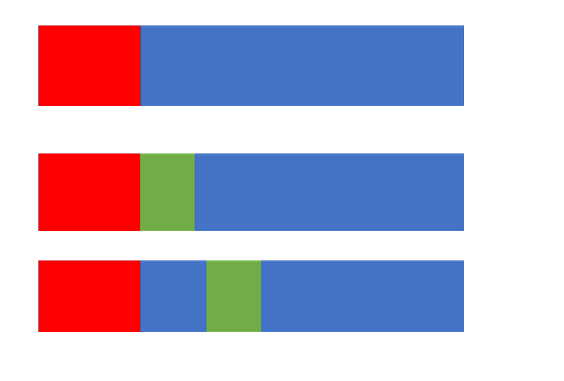

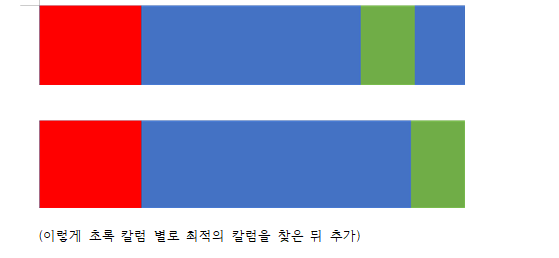

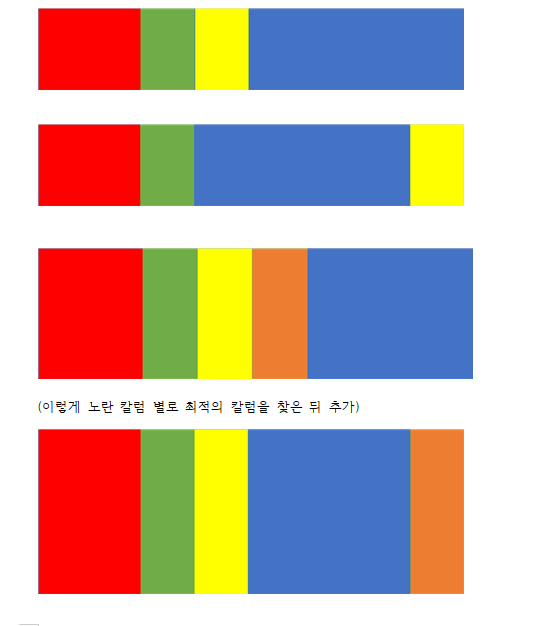

더 이상 rmse가 안 내려가고, test_score(r2)가 안 올라 갈때 까지 이를 반복하면서 최적 칼럼 선정

In [ ]:
x=c_종묘.drop(['종묘'], axis=1)
y=c_종묘['종묘']

In [ ]:
def feature_choice(df):
    df=df
    xgb_reg=xgb.XGBRegressor(random_state=42)
    data=pd.DataFrame(columns=['변수','rmse','test_score'])

    for i in range(10,51):
        x1=df.iloc[:, :9]
        x2=df.iloc[:, i]
        x=pd.concat([x1,x2], axis=1)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
        xgb_reg.fit(x_train, y_train)
        XGBscore_train = xgb_reg.score(x_train, y_train) 
        xgb_pred=xgb_reg.predict(x_test)
        rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
        test_score=xgb_reg.score(x_test, y_test)

        data=data.append({'변수':i, 'rmse':rmse, 'test_score':test_score}, ignore_index=True)
        i+1
    data=data.sort_values('test_score', ascending=False)
    data_2=data.head()

    return data_2

In [ ]:
feature_choice(c_종묘)

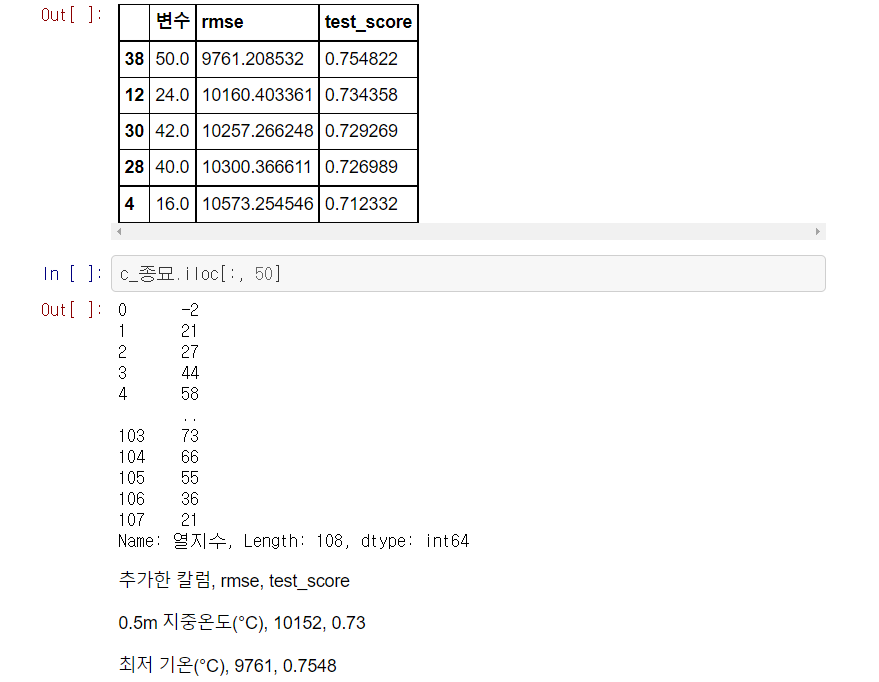

<big>**후진 소거법 및 단계적 선택법 예시**</big>

-----

1) a_남산골 한옥마을인 경우 남산골 한옥마을을 타겟, 그 외 나머지를 데이터로 지정했을 때, 

- R-squared=0.536, 

- Adj.R-squared=0.493, 

- AIC=2569, 

- BIC=2596이 나왔으며, 

train_test_split으로 train 80%, test 20%를 설정해주고 xgboost regressor 모델을 돌렸을 때, 

- rmse는 22452.61, 

- test_score(r2)는 0.687476가 나왔다.

2) b_남산골 한옥마을인 경우 

- R-squared=0.851, 

- Adj.R-squared=0.720, 

- AIC=2528,

- BIC=2665

마찬가지로 모델을 적용시켰을 때,

- rmse는 17892

- test_score(r2)는 0.801529이 나왔다.


이에 따라 version_b가 다중공선성 문제가 있는 데도 불구하고, version_a의 칼럼이 타겟에 대한 예측을 version_b에 비해 못한 다고 판단하여 후진소거법, 단계적 선택법, 전진선택법을 적용

먼저, p-value와 vif로 가장 낮은 칼럼을 각각 n개씩 설정하여 칼럼으로 부여해 줍니다.

그 다음 모델에 적용해본 뒤, rmse와 test_score로 부여해주기 전과 비교하여 결과가 좋아지는지 확인합니다.

ex) 10개씩으로 가정

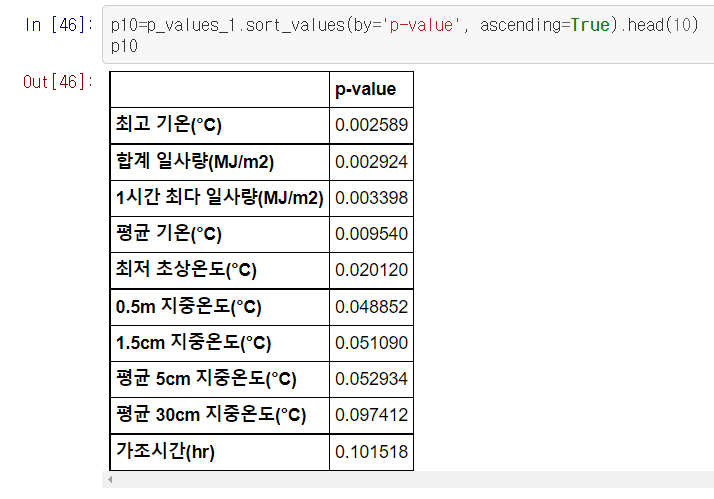

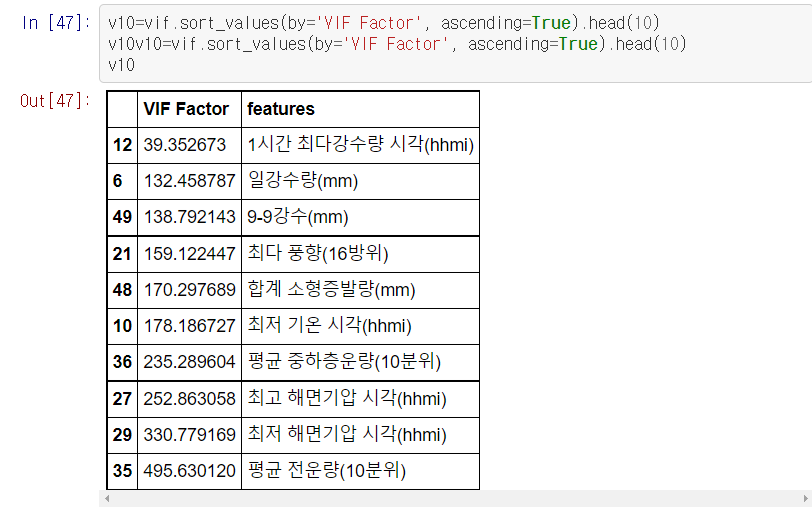

1) p-value, vif가 가장 낮은 10개씩(중복X) 칼럼을 version_a에 추가해준 결과


모든 칼럼 부여했을 때,

- XGboosting train 점수는 0.996

- rmse 점수는 22452.61803856131 입니다.

- test 스코어는 0.6874763913670736 입니다.

vif, p-value기준 낮은 칼럼 10개씩 부여했을 때

- XGboosting train 점수는 0.998

- rmse 점수는 20391.93785131974 입니다.

- test 스코어는 0.7422101275846333 입니다.

다중공선성 문제가 어느정도 잡힌 것을 볼 수 있다.

2)  p-value, vif가 가장 낮은 5개씩(중복X) 칼럼을 version_a에 추가해준 결과

- XGboosting train 점수는 0.998

- rmse 점수는 19202.94396002874 입니다.

- test 스코어는 0.7713956538068525 입니다.

이후 version_a에서 p-value, vif가 가장 낮은 5개씩(중복X) 칼럼을 version_a에 추가해준 칼럼 보기 중에서 전진선택법을 사용

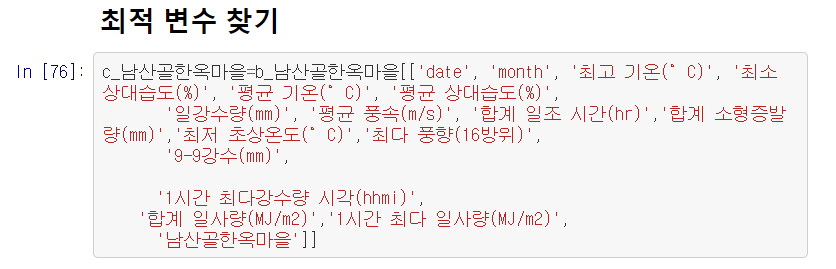


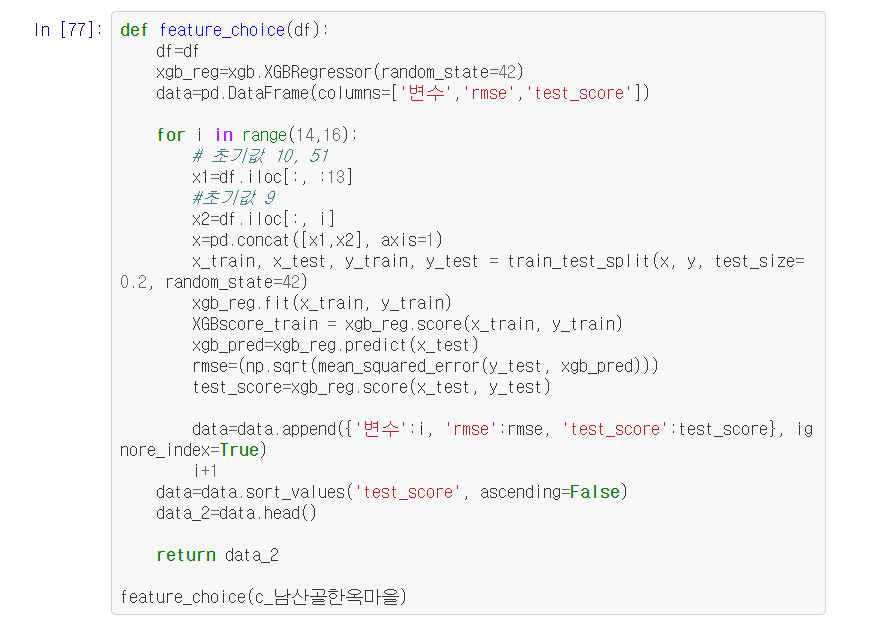






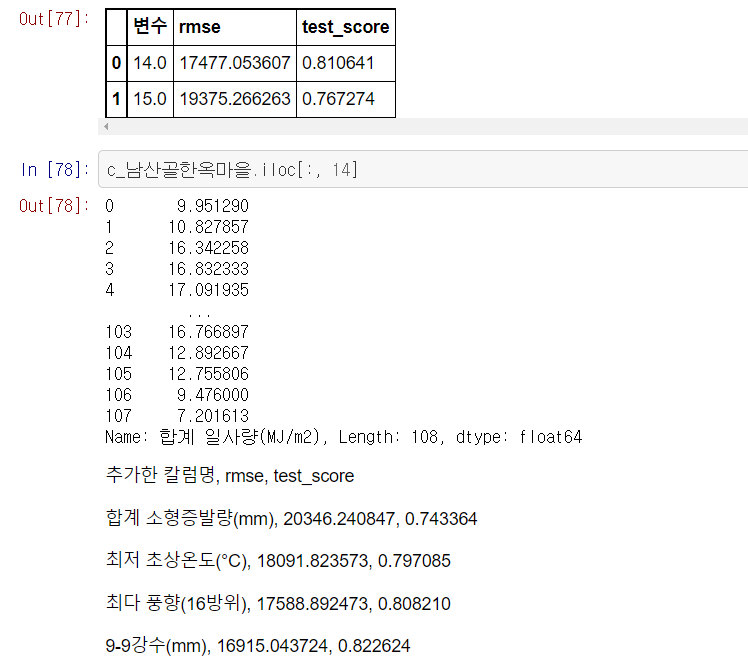


### **Hypothesis 5.** 날씨 데이터 최적 변수 선택(*LIME* & *SHAP*)

<big>변수 선택시 활용한 다른 방법: **XAI(eXplainable Artifical Intelligence:설명가능한 AI)**</big>

-----

XAI는 AI가 내린 결정이나 답을 AI가 스스로가 사람이 이해하는 형태로 제시할 수 있는 AI를 의미합니다. XAI는 학습과정 중 데이터로부터 다양한 패턴을 추출, 분석해 드러나지 않았던 법칙, 전략 등을 도출 할 수 있습니다.

<big>변수 선택시 저희는 **XAI**중에 **LIME**과 **SHAP**를 활용</big>하였습니다.

* <big>**LIME**<small> (Local Interpretable Model-Agnostic Explannation)</small></big>

-----

LIME은 모든 예측 모델에 대한 결과를 해석 가능하고 신뢰할 수 있는 방법으로 설명하는 새로운 기법을 제공하는 알고리즘입니다.

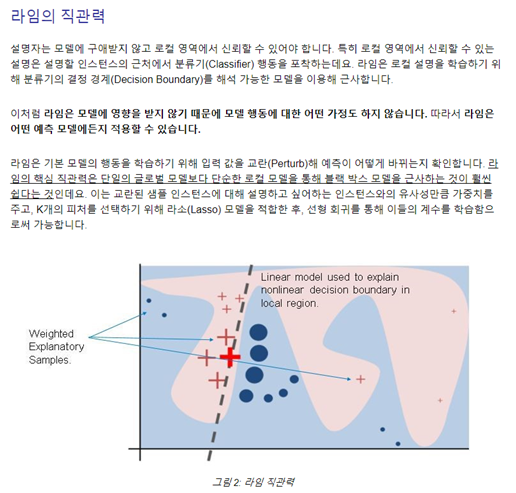

[출처 : SAS 머신러닝 해석력 시리즈 4탄: 라임(LIME)으로 모델 해석력 개선하기!] https://blogs.sas.com/content/saskorea/2018/12/10/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%ED%95%B4%EC%84%9D%EB%A0%A5-%EC%8B%9C%EB%A6%AC%EC%A6%88-4%ED%83%84-%EB%9D%BC%EC%9E%84lime%EC%9C%BC%EB%A1%9C-%EB%AA%A8%EB%8D%B8-%ED%95%B4%EC%84%9D%EB%A0%A5/

* <big>**SHAP**<small> (SHapley Additive exPlanations)</small></big>

-----

샤프(shap)의 목적은 예측에 대한 각 특성의 기여도를 계산하여 인스턴스(instance) x의 예측을 설명합니다. SHAP의 가장 큰 장점은 실제 예측값과 평균 예측값의 차이를 설명해주는 것을 목적으로 한다는 것입니다. 어떤 부분이 모델에 도움이 되었고, 어떤 부분이 모델에 도움이 되지 않았는지 설명해줍니다.

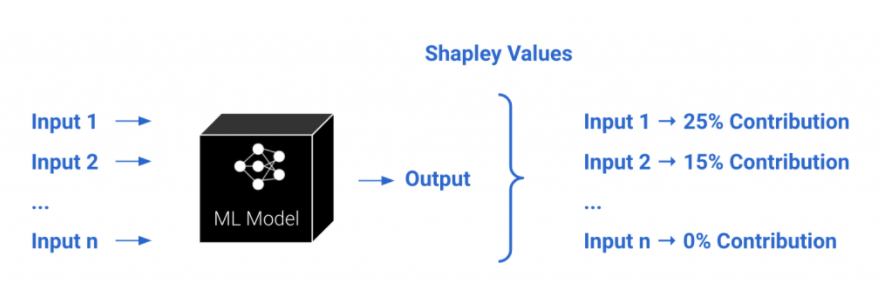

[출처 : fiddler AI Explained Video series: What are Shapley Values?] https://blog.fiddler.ai/2020/03/ai-explained-video-series-what-are-shapley-values/

<big>**관광지 중 경복궁 사례로 보는 LIME**</big>

-----
Lime으로 모델 해석력 분석
(linear regression 으로 모델 해석력 분석)

In [ ]:
!pip install lime

In [ ]:
from lime import lime_tabular
import lime as lime

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

reg_all=LinearRegression()
reg_all.fit(x_train, y_train)

In [ ]:
y_train_pred=reg_all.predict(x_train)
rmse=(np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2=round(reg_all.score(x_train, y_train), 2)

y_test_pred=reg_all.predict(x_test)
rmse_te=(np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2_te=round(reg_all.score(x_test, y_test), 2)

In [ ]:
import numpy as np
explainer=lime.lime_tabular.LimeTabularExplainer(np.array(x_train),
                                                feature_names=x_train.columns,
                                                class_names=['quality'],
                                                verbose=True, mode='regression')

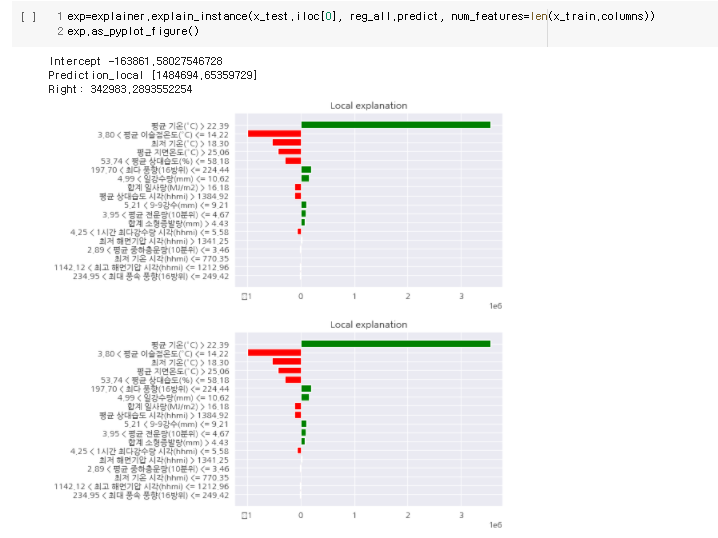

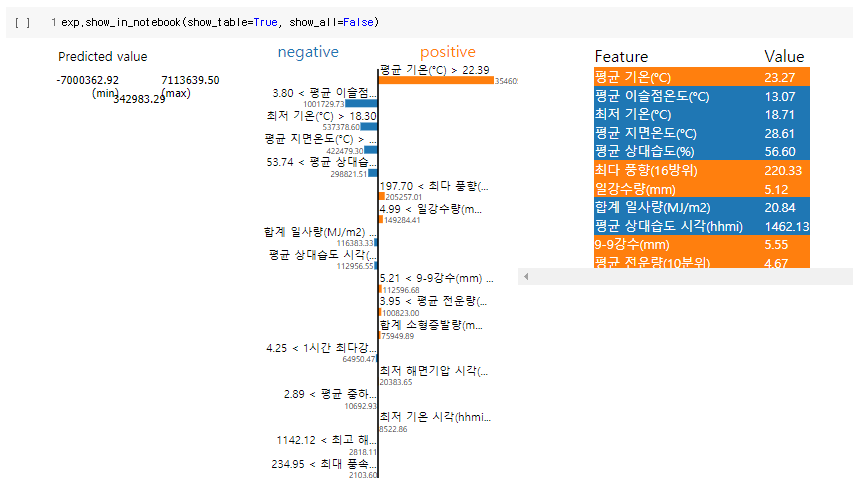

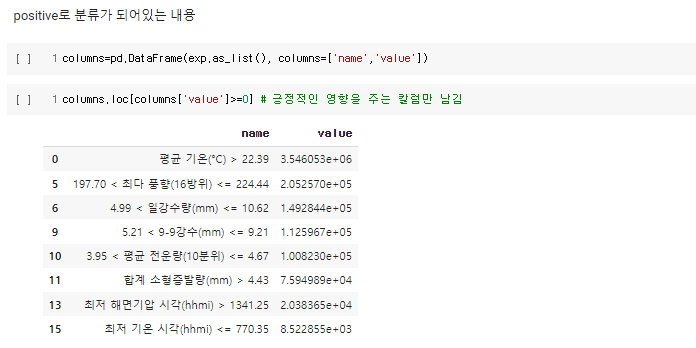

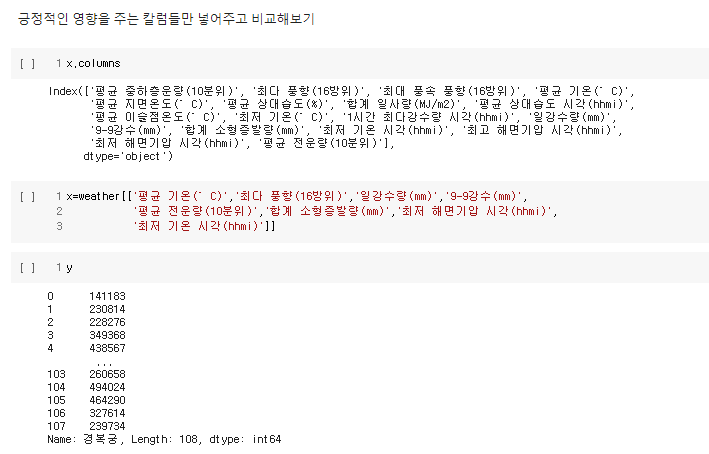

라임에서 긍정적인 영향을 주는 칼럼으로 분류된 칼럼만 부여하여

전과 후를 비교

- regression 모델별로 적용했고, 그 결과 XGBoost Regression이 결과가 제일 좋아서, XGBoost로 적용전과 적용후를 비교하였습니다.

1) 적용 전

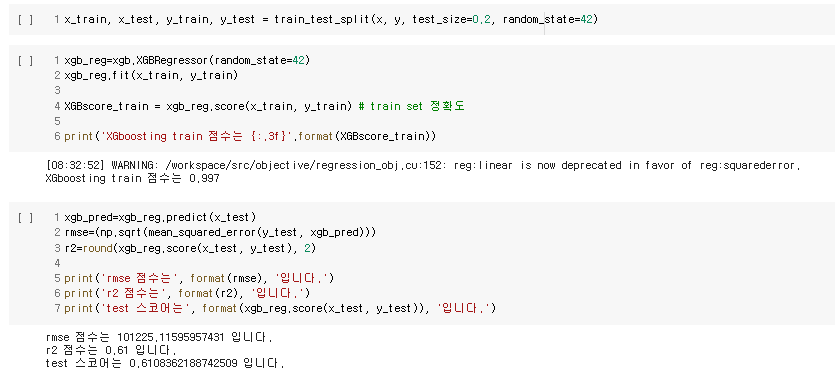

2) 적용 후

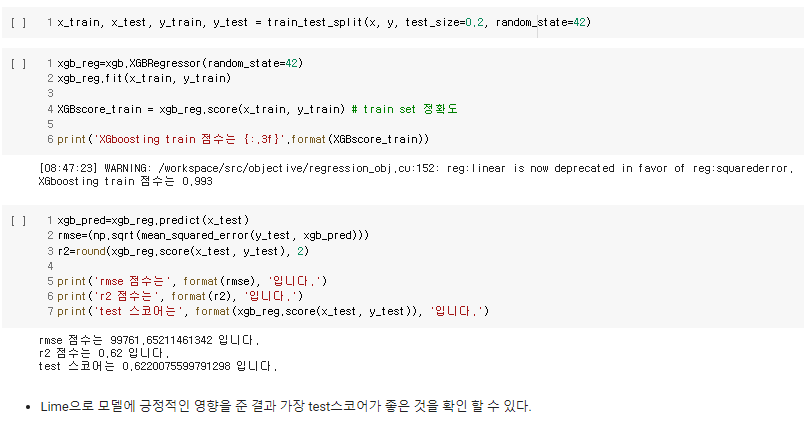

<big>**관광지 중 국립중앙박물관 사례로 보는 SHAP**</big>

-----

In [ ]:
!pip install shap

In [ ]:
import sys
sys.path.append('/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/shap-0.26.0-py2.7-macosx-10.9-x86_64.egg')
import shap

In [ ]:
import shap

explainer = shap.TreeExplainer(xgb_reg)
shap_values = explainer.shap_values(x)

In [ ]:
shap.initjs()

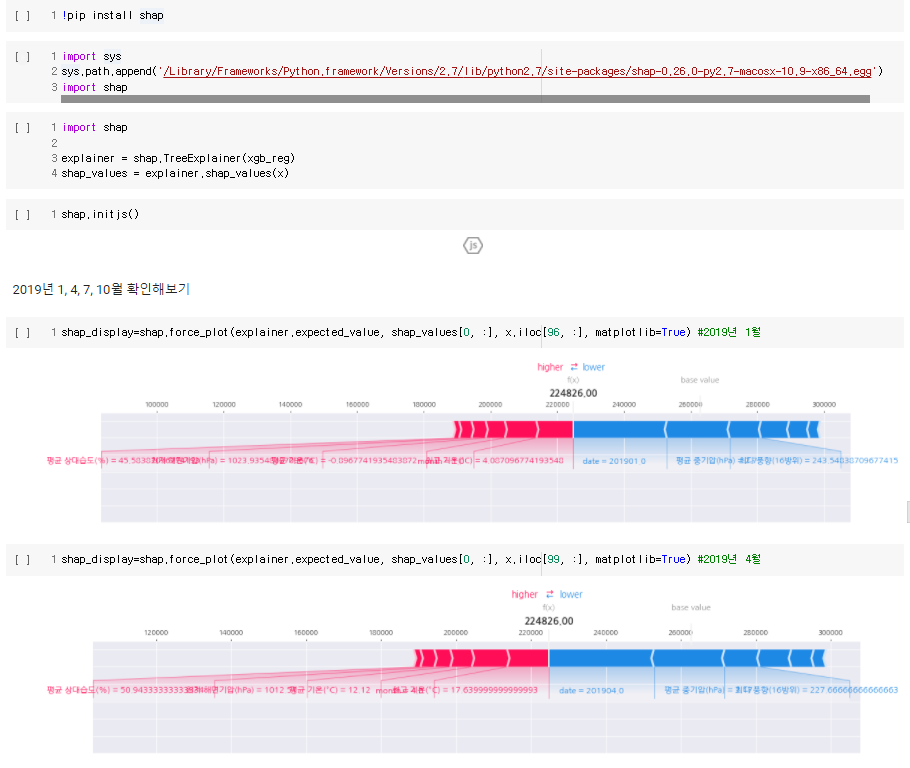


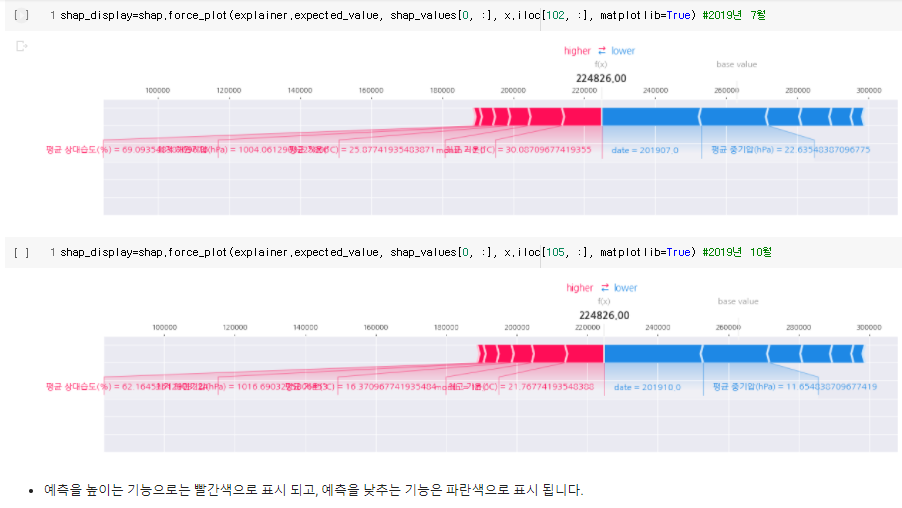

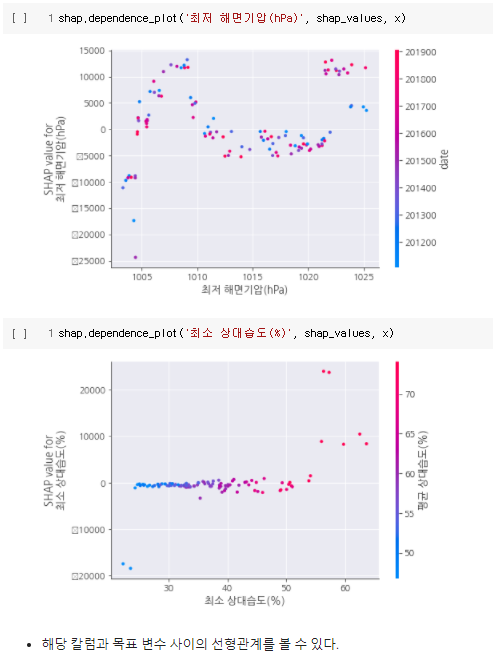

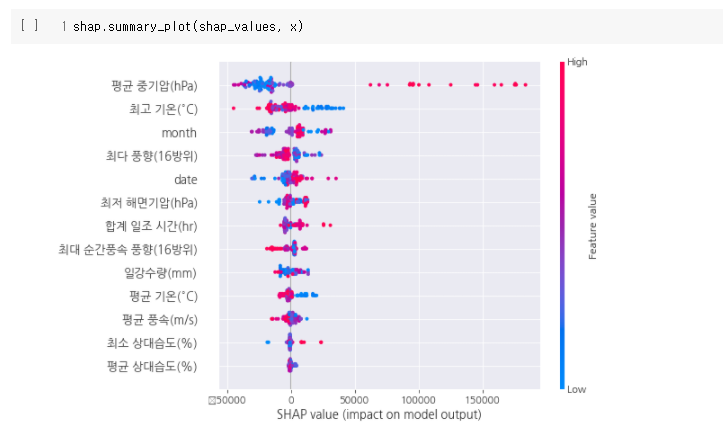

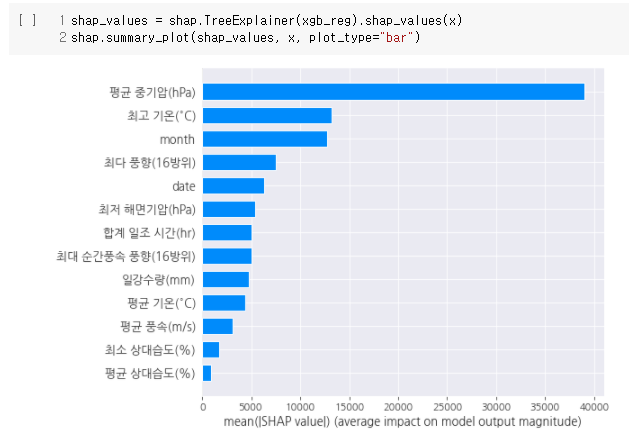

- 위의 두 그래프는 첫 번째 그래프는 빨간 점은 모델이 예측하는데에 도움이 됐던 칼럼, 파란 점은 모델에 도움이 안 됐던 칼럼, 두 번째 그래프는 feature_impotance으로 각 칼럼의 중요도를 바탕으로 나온 그래프입니다.

- 칼럼 선택 이외에도 어떤 부분이 모델에 도움이 됐는지, 어떤 부분이 모델에 악영향을 끼쳤는지를 계속 확인해보면서 데이터 2차 전처리 및 데이터 분석에 활용하면 좋을 것같다는 판단을 했습니다.

* 경복궁
  * rmse: 86256.29548151133
  * test_score: 0.71742

-----

* 국립중앙박물관
  * rmse: 33193.97130138815
  * test_score: 0.764465010112131

-----

* 종묘
  * rmse: 9761
  * test_score: 0.7548

-----

* 창경궁
  * rmse: 24087
  * test_score: 0.6964

-----

* 창덕궁
  * rmse: 32326
  * test_score: 0.798544

-----

* 덕수궁
  * rmse:71999
  * test_score:0.393462

-----

* 서울시립미술관_본관
  * rmse: 45811.434649
  * test_score: 0.446460

-----

* 태릉강릉조선왕릉전시관
  * rmse: 2775
  * test_score: 0.822767

-----

* 서대문자연사박물관
  * rmse: 5710.187952
  * test_score: 0.681183

-----

* 헌릉인릉
  * rmse: 760.532695
  * test_score: 0.863921

-----

* 선릉정릉
  * rmse: 3091.991399
  * test_score: 0.935115

-----

* 남산골한옥마을
  * rmse: 16915.043724
  * test_score: 0.822624

-----

* 서대문형무소역사관
  * rmse: 15088.406337
  * test_score: 0.695980

-----

* 트릭아이미술관
  * rmse: 3244.883811
  * test_score: 0.668241

## (updated)데이터 적재

@ 김수빈 담당

In [ ]:
# 데이터 가공 과정에서 추출한 관광 변수
tour_col = [col for col in Tour_Re_DF.columns if Tour_Re_DF[col].isna().sum()<=3]
print(tour_col)
tour_col.pop(0)

['date', '경복궁', '종묘', '창경궁', '창덕궁', '남산골한옥마을', '덕수궁', '서울시립미술관 본관', '국립중앙박물관', '태릉 ·  강릉 · 조선왕릉전시관', '서대문자연사박물관', '서대문형무소역사관', '트릭아이미술관', '헌릉ㆍ인릉', '선릉·정릉']


'date'

In [ ]:
# 필요한 Series 생성
def HeatIDX(data, temp_col="평균 기온(°C)", hum_col="평균 상대습도(%)"):
  # 여기서는 평균 기온과 평균 습도로 열지수의 평균을 구함
  T = data[temp_col].apply(lambda x: (x*1.8)+32)
  R = data[hum_col].apply(lambda x: x/100)

  H1 = pd.Series([-42.379 for i in range(108)])
  H2 = T.apply(lambda x: x*2.04901523)
  H3 = R.apply(lambda x: x*10.14333127)
  H4 = pd.Series([-0.22475541*t*r for t, r in zip(T,R)])
  H5 = T.apply(lambda x: -6.83783*(pow(10, -3))*((pow(x, 2))))
  H6 = R.apply(lambda x: -5.481717*(pow(10, -2))*(pow(x, 2)))
  H7 = pd.Series([1.22874*(pow(10,-3))*t*r for t, r in zip(T,R)])
  H8 = pd.Series([8.5282*(pow(10, -4))*t*(pow(r, 2)) for t, r in zip(T,R)])
  H9 = pd.Series([-1.99*(pow(10, -6))*(pow(t, 2))*(pow(r, 2)) for t, r in zip(T,R)])

  Heat_Index = pd.Series([h1+h2+h3+h4+h5+h6+h7+h8+h9 for h1, h2, h3, h4, h5, h6, h7, h8, h9 in zip(H1, H2, H3, H4, H5, H6, H7, H8, H9)], name='열지수')
  return Heat_Index

heatIDX = HeatIDX(Seoul_DF)

month = pd.Series(Seoul_DF['date'].apply(lambda x: x[-2:]),name='month')
month = month.astype('int64')

In [ ]:
# 데이터 가공 과정에서 추출한 날씨 공통 변수
common = ["최고 기온(°C)", "평균 기온(°C)", "최소 상대습도(%)", "평균 상대습도(%)", "일강수량(mm)", "평균 풍속(m/s)", "합계 일조 시간(hr)"]
# 경복궁 : common[1:5], common[-1],  feat1, heatIDX 
feat1 = ["풍정합(100m)", "최다 풍향(16방위)", "평균 전운량(10분위)", "합계 일사량(MJ/m2)", "합계 소형증발량(mm)", "9-9강수(mm)", "평균 10cm 지중온도(°C)", "평균 20cm 지중온도(°C)", "최저 기온 시각(hhmi)", "최고 기온 시각(hhmi)", "최저 해면기압 시각(hhmi)", "최대 순간풍속 시각(hhmi)"]
# 종묘
feat2 = ["최저 기온(°C)", "0.5m 지중온도(°C)"]
# 창경궁
feat3 = ["풍정합(100m)", "최대 순간풍속 풍향(16방위)", "최저 해면기압 시각(hhmi)", "최대 순간풍속 시각(hhmi)"]
# 창덕궁
feat4 = ["최대 순간풍속 풍향(16방위)", "최대 풍속(m/s)", "평균 상대습도 시각(hhmi)", "합계 일사량(MJ/m2)"]
# 남산골한옥마을
feat5 = ["최다 풍향(16방위)", "최저 초상온도(°C)", "합계 소형증발량(mm)", "9-9강수(mm)"]
# 덕수궁
feat6 = ["최대 풍속(m/s)", "합계 일사량(MJ/m2)", "0.5m 지중온도(°C)"]
# 서울시립미술관
feat7 = ["최저 기온(°C)", "최대 풍속(m/s)", "평균 해면기압(hPa)", "1시간 최다 일사량(MJ/m2)", "최저 초상온도(°C)", "평균 5cm 지중온도(°C)", "평균 30cm 지중온도(°C)", "5.0cm 지중온도(°C)", "9-9강수(mm)"]
# 국립중앙박물관
feat8 = ["최다 풍향(16방위)", "최대 순간풍속 풍향(16방위)", "평균 중기압(hPa)", "최저 해면기압(hPa)"]
# 태릉강릉
feat9 = ["최저 기온(°C)", "평균 중기압(hPa)", "평균 이슬점온도(°C)", "가조시간(hr)"]
# 서대문자연사박물관
feat10 = ["최대 순간풍속(m/s)", "최대 풍속(m/s)", "가조시간(hr)", "평균 지면온도(°C)", "5.0cm 지중온도(°C)", "합계 소형증발량(mm)"]
# 서대문형무소역사관
feat11 = ["최저 해면기압 시각(hhmi)", "평균 전운량(10분위)"]
# 트릭아이미술관
feat12 = ['평균 20cm 지중온도(°C)','1.5cm 지중온도(°C)', '9-9강수(mm)']
# 헌릉인릉
feat13 = ['최대 풍속(m/s)', '최고 해면 기압(hPa)', '최저 해면기압(hPa)', '평균 중하층운량(10분위)', '평균 5cm 지중온도(°C)', '평균 30cm 지중온도(°C)']
# 선릉정릉
feat14 = ['최대 풍속 풍향(16방위)', '평균 20cm 지중온도(°C)', '0.5m 지중온도(°C)']

In [ ]:
# 공유 폴더 저장을 위한 함수 작성
def save_DF(path, data=None):
  eval(f'{data}').to_csv(f'{path}/{data}.csv', index=False, encoding='utf-8')
  print(f'{data}가 {path}에 적재되었습니다.')
# 정재를 거치고 관광지 별로 나눈 데이터 프레임(14개)을 반복문으로 공유 폴더에 적재

In [ ]:
trans_list = ['GyeongBokGung', 'JongMyo', 'ChangGyeongGung', 'ChangDeokGung', 'NamSanGolHanOkVillage',
              'DuckSooGung', 'SeoulMuseumOfArt', 'NationalMuseumOfKorea', 'TaeReungGangNeung',
              'SeoDaeMunNaturalHistoryMuseum', 'SeoDaeMunPrisonHistoryMuseum', 'TrickEyeMuseum',
              'HeonLeungInReung', 'SunReungJungReung']

for (idx, kor), eng in zip(enumerate(tour_col), trans_list):
  if kor=='경복궁':
    spc_common = common[1:5]
    spc_common.append(common[-1])
    globals()[f'{eng}'] = pd.concat([Seoul_DF['date'], month, Seoul_DF.loc[:, spc_common], Seoul_DF.loc[:, eval(f'feat{idx+1}')], heatIDX, Seoul_DF[f'{kor}']], axis=1)
  else:
    globals()[f'{eng}'] = pd.concat([Seoul_DF['date'], month, Seoul_DF.loc[:, common], Seoul_DF.loc[:, eval(f'feat{idx+1}')], Seoul_DF[f'{kor}']], axis=1)

In [ ]:
# 사용 조건 : 데이터 프레임의 변수명은 영어로 선언되어야 함
# DATA_PATH : 초반에 선언한 데이터 적재 경로
for name in trans_list:
  save_DF(DATA_PATH, name)

GyeongBokGung가 /content/drive/MyDrive/Proj_WT/DataSets/Seoul에 적재되었습니다.
JongMyo가 /content/drive/MyDrive/Proj_WT/DataSets/Seoul에 적재되었습니다.
ChangGyeongGung가 /content/drive/MyDrive/Proj_WT/DataSets/Seoul에 적재되었습니다.
ChangDeokGung가 /content/drive/MyDrive/Proj_WT/DataSets/Seoul에 적재되었습니다.
NamSanGolHanOkVillage가 /content/drive/MyDrive/Proj_WT/DataSets/Seoul에 적재되었습니다.
DuckSooGung가 /content/drive/MyDrive/Proj_WT/DataSets/Seoul에 적재되었습니다.
SeoulMuseumOfArt가 /content/drive/MyDrive/Proj_WT/DataSets/Seoul에 적재되었습니다.
NationalMuseumOfKorea가 /content/drive/MyDrive/Proj_WT/DataSets/Seoul에 적재되었습니다.
TaeReungGangNeung가 /content/drive/MyDrive/Proj_WT/DataSets/Seoul에 적재되었습니다.
SeoDaeMunNaturalHistoryMuseum가 /content/drive/MyDrive/Proj_WT/DataSets/Seoul에 적재되었습니다.
SeoDaeMunPrisonHistoryMuseum가 /content/drive/MyDrive/Proj_WT/DataSets/Seoul에 적재되었습니다.
TrickEyeMuseum가 /content/drive/MyDrive/Proj_WT/DataSets/Seoul에 적재되었습니다.
HeonLeungInReung가 /content/drive/MyDrive/Proj_WT/DataSets/Seoul에 적재되었습니다.
SunReungJungReung가 /conte

In [ ]:
# 다른 사람들이 반복문 활용이 쉽도록 데이터 불러오는 함수 작성
def load_csv(path=None):
  file_list = os.listdir(path)
  file_list = [fpath for fpath in file_list if '(' not in fpath]
  file_list = [fpath for fpath in file_list if '.csv' in fpath]

  dfname_list = []

  for fpath in file_list:
    fname = fpath.split('.')[0]
    dfname_list.append("DF_"+fname) #모델 반복문 돌릴 때 필요한 데이터프레임 변수명 리스트
    try:  # 인코딩 에러 피하기 위한 방법
      globals()[f"DF_{fname}"] = pd.read_csv(f"{path}/{fpath}", encoding='euc-kr')
      globals()[f"DF_{fname}"] = globals()[f"DF_{fname}"].loc[:, [chk for chk in globals()[f"DF_{fname}"] if "Unnamed" not in chk]] #혹시 index도 같이 저장되었으면 없애줌
    except:
      try:
        globals()[f"DF_{fname}"] = pd.read_csv(f"{path}/{fpath}", encoding='cp949')
        globals()[f"DF_{fname}"] = globals()[f"DF_{fname}"].loc[:, [chk for chk in globals()[f"DF_{fname}"] if "Unnamed" not in chk]]
      except:
        globals()[f"DF_{fname}"] = pd.read_csv(f"{path}/{fpath}", encoding='utf-8')
        globals()[f"DF_{fname}"] = globals()[f"DF_{fname}"].loc[:, [chk for chk in globals()[f"DF_{fname}"] if "Unnamed" not in chk]]
  return dfname_list

In [ ]:
# EDA를 하면서, 생성되는 추가 파일 보관용
  #  사용 예 : make_dir(DATA_PATH, 'EDA')
def make_dir(path=None, dir_name=None):
  path = path+'/'+dir_name
  os.makedirs(path, exist_ok=True)
  print(f'폴더명 : {path}\n이미 존재하거나 방금 생성되었습니다.')
# 모델 검증 실패 혹은 가설 검증 실패로 새로운 csv파일을 EDA 폴더에 적재하기 전 해당 폴더 내 전체 csv 파일을 지움
  #  사용 예 : rm_all_csv(DATA_PATH+'/EDA')
  # 검증이 끝나기 전에 디렉토리 추가 생성 시(EDA2 등), 굳이 지울 필요 없음
def rm_all_csv(path=None):
  [os.remove(f) for f in glob.glob(f"{path}/*.csv")]
  print(f'{path} 내의 모든 csv파일을 삭제했습니다.')

# EDA

@김선홍 담당

In [ ]:
dflst = load_csv(DATA_PATH)
dflst

['DF_Seoul_Weather',
 'DF_Seoul',
 'DF_GyeongBokGung',
 'DF_JongMyo',
 'DF_ChangGyeongGung',
 'DF_ChangDeokGung',
 'DF_NamSanGolHanOkVillage',
 'DF_DuckSooGung',
 'DF_SeoulMuseumOfArt',
 'DF_NationalMuseumOfKorea',
 'DF_TaeReungGangNeung',
 'DF_SeoDaeMunNaturalHistoryMuseum',
 'DF_SeoDaeMunPrisonHistoryMuseum',
 'DF_TrickEyeMuseum',
 'DF_HeonLeungInReung',
 'DF_SunReungJungReung']

In [ ]:
extract_df = ["DF_Seoul_Weather", "DF_Seoul"]
dflst = [dfname for dfname in dflst if dfname not in extract_df]

데이터 가공(최적 칼럼 선택)이 완료된 관광지별 csv를 불러옵니다.

## **Hypothesis 6~8.**

- ~~가설 : 기온을 섭씨에서 화씨로 바꾸면 달라지지 않을까~~
- 가설 : 계절에 따라 관광지 선호도(현 데이터에서 알 수 있는 것은 입장객 수)가 달라지지 않았을까
- 가설 : 정규분포를 따르지 않는 기온을 범주화한 뒤, 더미화하면 모델 정확도가 올라가지 않을까


In [ ]:
# EDA를 위한 class 작성  (feature engineering, statsmodels)

class EDA :
  
  def __init__(self, data = None):
    self.data = data

  def binning_tp(self) :
    df = self.data
    # 최고 기온 25%, 50%, 75% 기준으로 binning  
    df.loc[df['최고 기온(°C)'] <= df['최고 기온(°C)'].quantile(0.25), 'tp_1'] = 0
    df.loc[(df['최고 기온(°C)'] > df['최고 기온(°C)'].quantile(0.25)) & (df['최고 기온(°C)'] <= df['최고 기온(°C)'].quantile(0.5)), 'tp_1'] = 1
    df.loc[(df['최고 기온(°C)'] > df['최고 기온(°C)'].quantile(0.5)) & (df['최고 기온(°C)'] <= df['최고 기온(°C)'].quantile(0.75)), 'tp_1'] = 2
    df.loc[df['최고 기온(°C)'] > df['최고 기온(°C)'].quantile(0.75), 'tp_1'] = 3
    # 평균 기온 25%, 50%, 75% 기준으로 binning  
    df.loc[df['평균 기온(°C)'] <= df['평균 기온(°C)'].quantile(0.25), 'tp_2'] = 0
    df.loc[(df['평균 기온(°C)'] > df['평균 기온(°C)'].quantile(0.25)) & (df['평균 기온(°C)'] <= df['평균 기온(°C)'].quantile(0.5)), 'tp_2'] = 1
    df.loc[(df['평균 기온(°C)'] > df['평균 기온(°C)'].quantile(0.5)) & (df['평균 기온(°C)'] <= df['평균 기온(°C)'].quantile(0.75)), 'tp_2'] = 2
    df.loc[df['평균 기온(°C)'] > df['평균 기온(°C)'].quantile(0.75), 'tp_2'] = 3
    return df

  # binning한 최고온도, 평균온도 더미화
  def dummies(self) :
    df = EDA(self.data).binning_tp()
    # 최고온도 더미화
    df_tp_1 = pd.get_dummies(df['tp_1'])
    df = pd.concat([df, df_tp_1], axis = 1)
    df = df.rename(columns = {0 : 'tp_1_0', 1 : 'tp_1_1', 2 : 'tp_1_2', 3 : 'tp_1_3'})
    df = df.drop('tp_1', axis= 1)
    #평균온도 더미화
    df_tp_2 = pd.get_dummies(df['tp_2'])
    df = pd.concat([df, df_tp_2], axis = 1)
    df = df.rename(columns = {0 : 'tp_2_0', 1 : 'tp_2_1', 2 : 'tp_2_2', 3 : 'tp_2_3'})
    df = df.drop('tp_2', axis= 1)
    return df

  # season데이터 추가(3,4,5 : 봄, 6,7,8 : 여름, 9,10,11 : 가을, 12,1,2 : 겨울)
  def add_season(self, change_featurename = '타겟이름') :
    df = self.data.rename(columns = {change_featurename : 'target'})
    df.loc[(df['month'] == 12 )|(df['month'] == 1 )|(df['month'] == 2 ), 'season'] = 4
    df.loc[(df['month'] == 3 )|(df['month'] == 4 )|(df['month'] == 5 ), 'season'] = 1
    df.loc[(df['month'] == 6 )|(df['month'] == 7 )|(df['month'] == 8 ), 'season'] = 2
    df.loc[(df['month'] == 9 )|(df['month'] == 10 )|(df['month'] == 11 ), 'season'] = 3
    return df
  
  def make_season_data(self) : # 계절 binning 후 계절별 dataframe 만들기
    spring = self.data.loc[(self.data['season'] == 1)].drop(['month', 'season'], axis = 1)
    summer = self.data.loc[(self.data['season'] == 2)].drop(['month', 'season'], axis = 1)
    fall = self.data.loc[(self.data['season'] == 3)].drop(['month', 'season'], axis = 1)
    winter = self.data.loc[(self.data['season'] == 4)].drop(['month', 'season'], axis = 1)
    return spring, summer, fall, winter
  
  # statsmodel 확인
  def check_statsmodels(self) :
    df = self.data
    X = df.drop(['date', 'target'], axis =1)
    y = df['target']
    X_constant = sm.add_constant(X)
    model = sm.OLS(y, X_constant)
    lin_reg = model.fit()
    print(lin_reg.summary())

In [ ]:
# 분포확인을 위한 함수
def check_distribution(data, column_list) :
  for i in column_list :
    fig, ax = plt.subplots(figsize = (10,5))
    sns.distplot(data[i])
    plt.rc('font', family='NanumGothic') 
    plt.title(f'{i}에 대한 분포')

[선홍님 링크] https://colab.research.google.com/drive/17waUnc_XfDSyIbjnakg63PIujG4nSXb2?usp=sharing

현재 
- 계절별로 나눠도 정규분포 어느정도 따르려고 하지만 잘 안따름
- statsmodel을 확인해 보면 모델에 적합하지 않은것 같음

향후 계획 
- 지금 계절데이터는 month데이터를 binning 한 작업이라고 볼 수있음
- month데이터를 사용하고 계절데이터 삭제 예정
- 타겟 log화 예정
- feature들 scaling 예정

## (updating) Hypothesis 11. 미세먼지 데이터를 함께 넣으면 더 좋은 결과가 나올 수 있을까?

#MODELING

@박정열 담당

## Machine Learning

### Hypothesis 9. ~~Stacking을 하면 점수를 줄일 수 있을까?~~

점수는 줄였는데, 시간이 오래 걸림

### Hypothesis 10. 각 데이터에서 최적화된 모델은 어떻게 찾아야 하나?

step1) 전처리가 완료된 데이터 프레임을 받아서 모델을 돌리는 클래스에 접속한 뒤, 예측값을 받습니다.

- /content/drive/MyDrive/Proj_WT/DataSets/박정열/ 
이라는 path에 있는 관광지의 데이터를 모두 가져와서 dict 형태로 담아놓는다.

~~ETL, EDA, MODEL의 전 과정이 정리되면, /content/drive/MyDrive/Proj_WT/DataSets/Seoul/이란 path로 통합할 예정~~

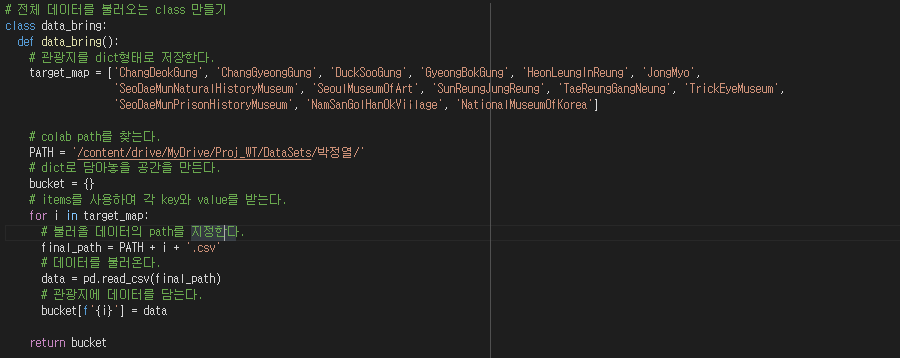

- 하나의 관광지 데이터가 들어오면 2017년 12월의 이전의 데이터를 train
- 2017년 12월 이후의 데이터를 test로 놓고 분석을 진행할 예정이다.
- 최고기온과 평균기온을 더미화 해주었기 때문에 다중 공선성을 방지하고자 기온에 대한 데이터를 제거해 줘야 했다.
- 경복궁의 데이터는 최고기온이 없었기 때문에 try except구문을 사용하여 기온 데이터를 제거해주고 X_train, X_test, y_train, y_test를 나눠주는 class를 만들었다.

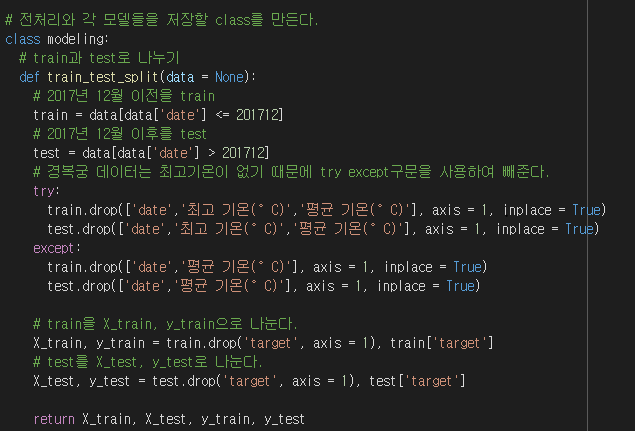

- 각 모델을 불러올 모델들을 class modeling 밑의 함수로 놓은 것이다.
- rmse와 score 그리고 model을 dataframe형태로 저장 시켜놓을 거기 떄문에 rmse의 함수를 만들었다.

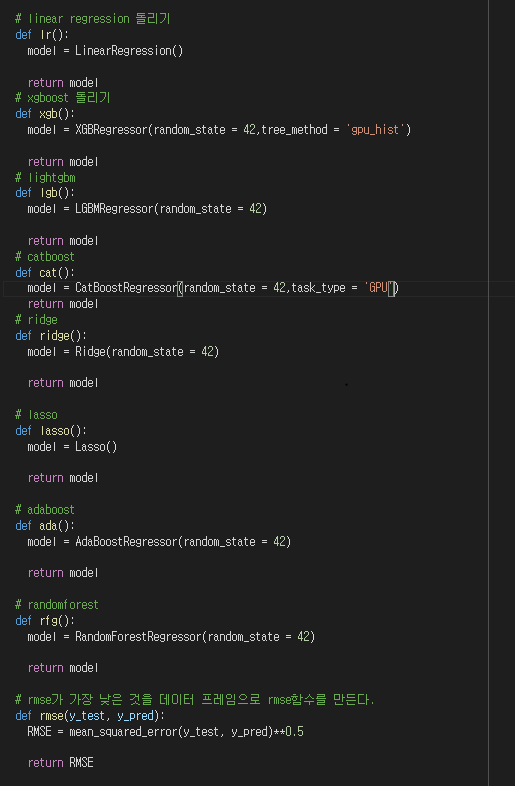

- 전체의 데이터를 돌려보기 위해서 class_all_model이라는 class를 구성했다.
- models에서는 각 모델을 한번씩 돌리고 그 모델을 쉽게 구별하기 위해서 dict형태로 쌓아놨다.
- 그것을 가지고 각 모델을 돌리기 위한 run이라는 함수를 실행하려 했고 위의 dict를 불러와서 final,_rmse, model_score, model_store라는 공간을 만들어주고
- dict형태의 모델들을 돌려서 final_rmse, model_score, model_store에 저장해준다.

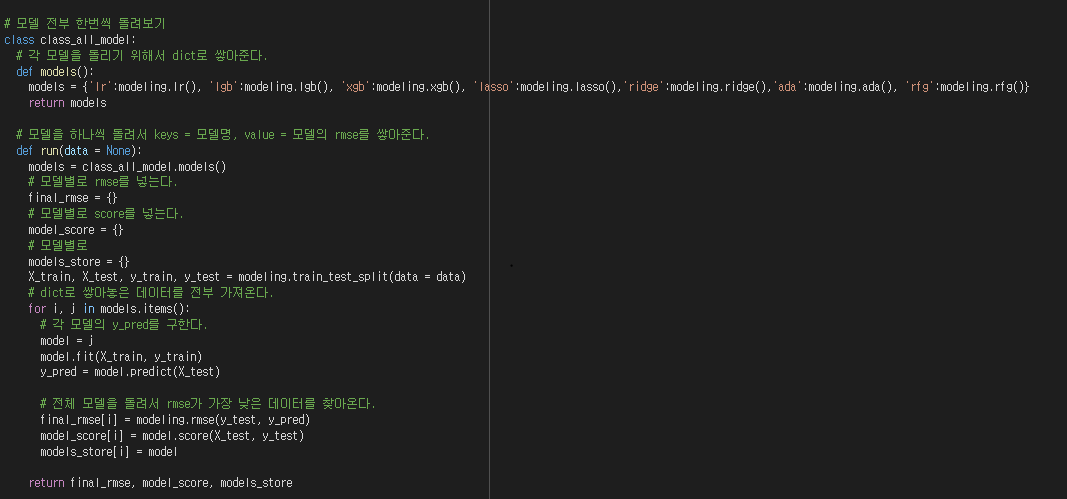

- 각 관광지별로 데이터프레임을 만들어 보기 편하게 바꾼다.

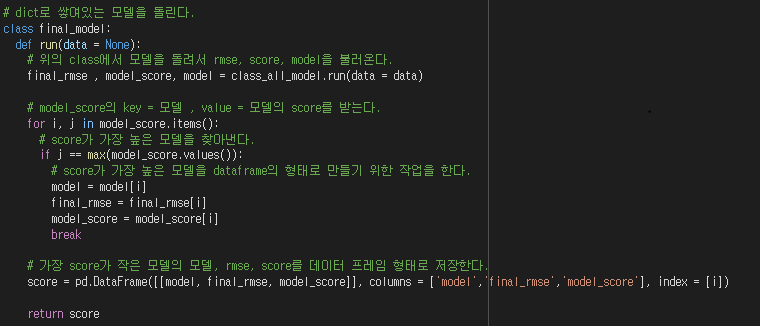

- 전체 코드를 실행하기 위한 class 를 만들었다.
- 각 데이터프레임 별 데이터를 dict형태로 가져와서 관광지 데이터를 모델을 돌린 후 예측값을 토대로 데이터 프레임의 형태로 만들어 준다.

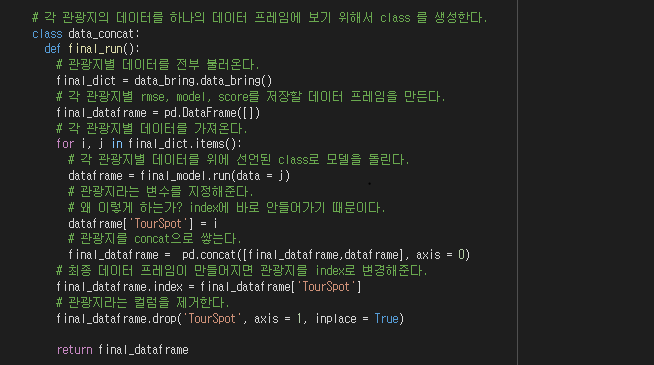

- index는 관광지 그리고 model, model_rmse, model_score의 데이터를 불러온다.

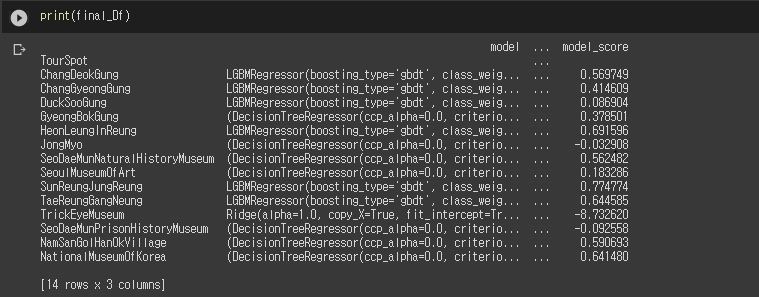

## Deep Learning

### (updating) Hypothesis 12. 딥러닝으로 구현하면 더 좋은 점수를 비교적 빨리 예측할 수 있지 않을까?



```
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import tensorflow as tf
def rmse(true, pred):
  RMSE = mean_squared_error(true, pred)
  return RMSE
# shape 맞춰주기
X_train_t = X_train.values.reshape(X_train.shape[0], 18, 1)
X_test_t = X_test.values.reshape(X_test.shape[0], 18, 1)
# LSTM 사용하기
model = Sequential()
model.add(LSTM(512, activation = 'relu', input_shape = (X_train_t.shape[1], X_train_t.shape[2],), return_sequences = True))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1))
model.compile(loss = 'mae', optimizer = 'adam', metrics = ['mean_squared_error'])
print(model.summary())
model.fit(X_train_t, y_train, epochs = 100, batch_size = 1, validation_data = (X_test_t, y_test))
```



* 데이터가 너무 적어서 사용 불가능
* robust 등의 scaler도 사용해봤으나, 결과가 좋지 않았음

* 데이터 증강 후 결과가 좋아진다면, 딥러닝 채택

#시각화 및 결론 도출 후 여행지 추천

아직 담당자 미정

step2) 결론 도출을 위한 관광지 추천 방식 가설 검증

관광추천지수 가설 후보

1) 가설 1: 

-----
타겟 분포의 75%기준을 잡고 

$ 추천지수 = \frac{실제값}{75\% 값} $

```
df['추천지수'] = df[tour].apply(lambda x : x/df[tour].quantile(0.75))
```

<small>@**김선홍** 담당</small>

2) 가설 2: 

-----

각 기후 칼럼 증분 값
* x1= 각 기후 칼럼의 총 평균 값
* x2= 해당 날짜의 기후 칼럼
* y1= 관광지 관광객 총 평균
* y2= 인공지능이 예측한 시점 관광지 관광객 수
* 기후 칼럼 증분 값 = ((y2-y1)/(y2+y1))/((x2-x1)/(x2+x1))


$추천지수= \frac{각 기후 칼럼의 증분값의 합}{해당 관광지데이터 프레임의 기후 칼럼의 총 개수}$


```
class Input:
    def tour_index(x1,x2,y1,y2):
        e=((y2-y1)/(y2+y1))/((x2-x1)/(x2+x1))
        e=pd.DataFrame(e, columns=['편차'])
        return e
    def output_index(y1,y2):
        a1=GyeongBokGung['총평균 기온(°C)'] # 2011-2019 총 평균 기온
        a2=GyeongBokGung['평균 기온(°C)'] # 오늘 평균 기온
        a=Input.tour_index(a1,a2,y1,y2)
        ########################################  # 이런 식으로 총 18개의 칼럼에 대한
        # .....................................#  # 증분 값을 구합니다.
        ########################################
        r1=GyeongBokGung[ '총평균 합계 일사량(MJ/m2)'] # 2011-2019 총 평균 합계 일사량
        r2=GyeongBokGung['합계 일사량(MJ/m2)'] # 오늘 합계 일사량 
        r=Input.tour_index(r1,r2,y1,y2)
        s=(a+b+c+d+e+f+g+h+i+j+k+l+m+n+o+p+q+r)/18 
        # 마지막으로 18개 기후 칼럼의 증분값을 전부 더한 후, 칼럼의 갯수로 나누어줍니다.
        return s
```



<small>@**윤요섭** 담당</small>

관광추천지수를 관광지별로 구한 뒤, 서로 비교하여 Rank 구하여, 이를 바탕으로 관광지를 추천

step3) 마지막으로 위의 2개의 클래스에 접속해서 받은 데이터 프레임을 가지고, 추천 시각화 서비스를 구현합니다.